In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'white')
plt.rc('font', family='serif')


c_background = '#FFFFFF'

colours = ['#8D7BBC', '#60A561', '#EDAE49', '#D1495B', '#1E3231', '#00798C', '#30638E', '#003D5B' ]

the_data = '../data/comma-separated-values-file-1.csv'

# Importar datos

In [2]:
df = pd.read_csv(the_data)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Report Number Local Case Number                Agency Name  \
0   MCP93210035         190045952   Montgomery County Police   
1   MCP93210035         190045952   Montgomery County Police   
2   MCP26390083         190045941   Montgomery County Police   
3   MCP26390083         190045941   Montgomery County Police   
4    DD56340027         190045937  Rockville Police Departme   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  09/25/2019 11:20:00 AM  Maryland (State)   
1  Property Damage Crash  09/25/2019 11:20:00 AM  Maryland (State)   
2           Injury Crash  09/25/2019 09:58:00 AM            County   
3           Injury Crash  09/25/2019 09:58:00 AM            County   
4           Injury Crash  09/25/2019 09:50:00 AM  Maryland (State)   

       Road Name Cross-Street Type Cross-Street Name Off-Road Description  \
0    GEORGIA AVE            County        DAWSON AVE                  NaN   
1    GEORGIA AVE            County        DAWSON AVE                  NaN   
2     BEL PRE RD            County     NORTH GATE DR                  NaN   
3     BEL PRE RD            County     NORTH GATE DR                  NaN   
4  VEIRS MILL RD            County    TWINBROOK PKWY                  NaN   

   ... Speed Limit Driverless Vehicle Parked Vehicle Vehicle Year  \
0  ...          25                 No             No         2019   
1  ...          25                 No             No         2009   
2  ...          35                 No             No         2018   
3  ...          35                 No             No         2015   
4  ...          45                 No             No         2016   

  Vehicle Make Vehicle Model Equipment Problems   Latitude  Longitude  \
0        BUICK       ENCLAVE          NO MISUSE  39.044760 -77.052257   
1         ACUR            4S          NO MISUSE  39.044760 -77.052257   
2       TOYOTA         CAMRY          NO MISUSE  39.090453 -77.050633   
3        HONDA           CRV          NO MISUSE  39.090453 -77.050633   
4         HOND            TK          NO MISUSE  39.073533 -77.111992   

                      Location  
0     (39.04476, -77.05225667)  
1     (39.04476, -77.05225667)  
2  (39.09045333, -77.05063333)  
3  (39.09045333, -77.05063333)  
4    (39.073533, -77.11199183)  

[5 rows x 43 columns]

# Exploración los datos

## Generalidades

In [4]:
#numero de filas y columnas
df.shape

(99275, 43)

In [5]:
#nombre de las columnas (variables)
df.columns.values

array(['Report Number', 'Local Case Number', 'Agency Name',
       'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name',
       'Cross-Street Type', 'Cross-Street Name', 'Off-Road Description',
       'Municipality', 'Related Non-Motorist', 'Collision Type',
       'Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle',
       'Vehicle Year', 'Vehicle Make', 'Vehicle Model',
       'Equipment Problems', 'Latitude', 'Longitude', 'Location'],
      dtype=object)

In [ ]:
#tipo de variables
df.dtypes

In [6]:
#datos faltantes (números)
missing_values = df.isnull().sum()
missing_values

Report Number                         0
Local Case Number                     0
Agency Name                           0
ACRS Report Type                      0
Crash Date/Time                       0
Route Type                         9498
Road Name                          9057
Cross-Street Type                  9508
Cross-Street Name                  9061
Off-Road Description              90219
Municipality                      88407
Related Non-Motorist              96278
Collision Type                      330
Weather                            7791
Surface Condition                 11771
Light                               832
Traffic Control                   15884
Driver Substance Abuse            18258
Non-Motorist Substance Abuse      96900
Person ID                             0
Driver At Fault                       0
Injury Severity                       0
Circumstance                      80038
Driver Distracted By                  0
Drivers License State              4564


In [7]:
#valores faltantes (porcentaje)

# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values.sum()

# percent of data that is missing
perc_nan_rows = (total_missing/total_cells) * 100

print('Contamos con',perc_nan_rows, ' % de filas con MÍNIMO un dato faltante' )

Contamos con 13.50116249787705  % de filas con MÍNIMO un dato faltante


## Separación de variables: categóricas y numéricas

Sabemos que tenemos todo tipo de datos, para una exploración mas clara vamos a separarlos por dos grandes bandos:
* Variables numéricas
* Variables categóricas

### Variables numéricas

In [8]:
# nombre de columnas numéricas
numeric_variables = df._get_numeric_data().columns.values
numeric_variables

array(['Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude'],
      dtype=object)

### Variables categóricas

In [9]:
all_variables = df.columns.values
categorical_variables = np.setdiff1d( all_variables, numeric_variables )
categorical_variables

array(['ACRS Report Type', 'Agency Name', 'Circumstance',
       'Collision Type', 'Crash Date/Time', 'Cross-Street Name',
       'Cross-Street Type', 'Driver At Fault', 'Driver Distracted By',
       'Driver Substance Abuse', 'Driverless Vehicle',
       'Drivers License State', 'Equipment Problems', 'Injury Severity',
       'Light', 'Local Case Number', 'Location', 'Municipality',
       'Non-Motorist Substance Abuse', 'Off-Road Description',
       'Parked Vehicle', 'Person ID', 'Related Non-Motorist',
       'Report Number', 'Road Name', 'Route Type', 'Surface Condition',
       'Traffic Control', 'Vehicle Body Type', 'Vehicle Continuing Dir',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Going Dir', 'Vehicle ID', 'Vehicle Make', 'Vehicle Model',
       'Vehicle Movement', 'Vehicle Second Impact Location', 'Weather'],
      dtype=object)

Podemos notar que las variables categóricas son las que más abundan en nuestro _data set_

## Exploración superficial: Variables categóricas

In [10]:
df[categorical_variables].head()

ACRS Report Type                Agency Name Circumstance  \
0  Property Damage Crash   Montgomery County Police          NaN   
1  Property Damage Crash   Montgomery County Police          NaN   
2           Injury Crash   Montgomery County Police          NaN   
3           Injury Crash   Montgomery County Police          NaN   
4           Injury Crash  Rockville Police Departme          NaN   

      Collision Type         Crash Date/Time Cross-Street Name  \
0  SAME DIR REAR END  09/25/2019 11:20:00 AM        DAWSON AVE   
1  SAME DIR REAR END  09/25/2019 11:20:00 AM        DAWSON AVE   
2  SAME DIR REAR END  09/25/2019 09:58:00 AM     NORTH GATE DR   
3  SAME DIR REAR END  09/25/2019 09:58:00 AM     NORTH GATE DR   
4  HEAD ON LEFT TURN  09/25/2019 09:50:00 AM    TWINBROOK PKWY   

  Cross-Street Type Driver At Fault    Driver Distracted By  \
0            County              No          NOT DISTRACTED   
1            County             Yes       OTHER DISTRACTION   
2            County              No          NOT DISTRACTED   
3            County             Yes          NOT DISTRACTED   
4            County             Yes  LOOKED BUT DID NOT SEE   

  Driver Substance Abuse  ... Vehicle Continuing Dir Vehicle Damage Extent  \
0          NONE DETECTED  ...                  South             DISABLING   
1          NONE DETECTED  ...                  South             DISABLING   
2          NONE DETECTED  ...                   West             DISABLING   
3          NONE DETECTED  ...                   West             DISABLING   
4                    NaN  ...                  North             DISABLING   

  Vehicle First Impact Location Vehicle Going Dir  \
0                    SIX OCLOCK             South   
1                 TWELVE OCLOCK             South   
2                    SIX OCLOCK              West   
3                 TWELVE OCLOCK              West   
4                 TWELVE OCLOCK              East   

                             Vehicle ID Vehicle Make Vehicle Model  \
0  A881D05B-BFC7-405D-9444-575186EB1A2F        BUICK       ENCLAVE   
1  E2CEA618-9233-411D-A07C-4E3AAD0652FF         ACUR            4S   
2  EAECEAC7-F42A-4A69-9A80-A5888F8461C7       TOYOTA         CAMRY   
3  3D00AD70-1097-48E4-8242-A98C04F33ABD        HONDA           CRV   
4  FA41143F-8B05-41FD-9401-ABC98BFFB127         HOND            TK   

          Vehicle Movement Vehicle Second Impact Location Weather  
0  STOPPED IN TRAFFIC LANE                     SIX OCLOCK   CLEAR  
1    MOVING CONSTANT SPEED                  TWELVE OCLOCK   CLEAR  
2  STOPPED IN TRAFFIC LANE                     SIX OCLOCK   CLEAR  
3    MOVING CONSTANT SPEED                  TWELVE OCLOCK   CLEAR  
4             ACCELERATING                  TWELVE OCLOCK   CLEAR  

[5 rows x 39 columns]

In [11]:
#valores faltantes de cada variable
# summarize the number of rows with missing values for each column
for i in df[categorical_variables].columns.values:
	# count number of rows with missing values
	n_miss = df[categorical_variables][i].isnull().sum()
	perc = n_miss / df[categorical_variables].shape[0] * 100
	print(i, 'tiene', n_miss , 'valores faltantes, esto quiere decir', perc, ' % del total de los datos\n')

ACRS Report Type tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Agency Name tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Circumstance tiene 80038 valores faltantes, esto quiere decir 80.62251322085116  % del total de los datos

Collision Type tiene 330 valores faltantes, esto quiere decir 0.33240997229916897  % del total de los datos

Crash Date/Time tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Cross-Street Name tiene 9061 valores faltantes, esto quiere decir 9.127171996978092  % del total de los datos

Cross-Street Type tiene 9508 valores faltantes, esto quiere decir 9.577436414001511  % del total de los datos

Driver At Fault tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Driver Distracted By tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Driver Substance Abuse tiene 18258 valores faltantes, esto quiere decir 18.391337194661293  % del to

Los valores con mayor número de datos faltantes son:
* Circumstance
* Municipality
* Non-Motorist Substance Abuse
* Off-Road Description
* Related Non-Motorist
* Equipment Problems
* Driver Substance Abuse
 
 Estas variables pueden ser eliminadas

In [12]:
#eliminar variables seleccionadas
df.drop(columns= ['Circumstance', 'Municipality', 'Non-Motorist Substance Abuse',
                  'Off-Road Description', 'Related Non-Motorist', 'Equipment Problems',
                  'Driver Substance Abuse'], inplace=True)

In [13]:
#obtener (de nuevo) datos categóricos
all_variables = df.columns.values
categorical_variables = np.setdiff1d( all_variables, numeric_variables )
categorical_variables

array(['ACRS Report Type', 'Agency Name', 'Collision Type',
       'Crash Date/Time', 'Cross-Street Name', 'Cross-Street Type',
       'Driver At Fault', 'Driver Distracted By', 'Driverless Vehicle',
       'Drivers License State', 'Injury Severity', 'Light',
       'Local Case Number', 'Location', 'Parked Vehicle', 'Person ID',
       'Report Number', 'Road Name', 'Route Type', 'Surface Condition',
       'Traffic Control', 'Vehicle Body Type', 'Vehicle Continuing Dir',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Going Dir', 'Vehicle ID', 'Vehicle Make', 'Vehicle Model',
       'Vehicle Movement', 'Vehicle Second Impact Location', 'Weather'],
      dtype=object)

## Exploración superficial: Variables numéricas

In [14]:
df[numeric_variables].head()

Speed Limit  Vehicle Year   Latitude  Longitude
0           25          2019  39.044760 -77.052257
1           25          2009  39.044760 -77.052257
2           35          2018  39.090453 -77.050633
3           35          2015  39.090453 -77.050633
4           45          2016  39.073533 -77.111992

In [15]:
df[numeric_variables].describe().T

count         mean         std       min          25%  \
Speed Limit   99275.0    32.954319   10.973835   0.00000    30.000000   
Vehicle Year  99275.0  1970.072737  330.133564   0.00000  2004.000000   
Latitude      99275.0    39.081756    0.072480  38.00812    39.022775   
Longitude     99275.0   -77.112221    0.099671 -79.48600   -77.187332   

                      50%          75%          max  
Speed Limit     35.000000    40.000000    70.000000  
Vehicle Year  2009.000000  2014.000000  9999.000000  
Latitude        39.073555    39.136402    39.990414  
Longitude      -77.105297   -77.040070   -75.527708

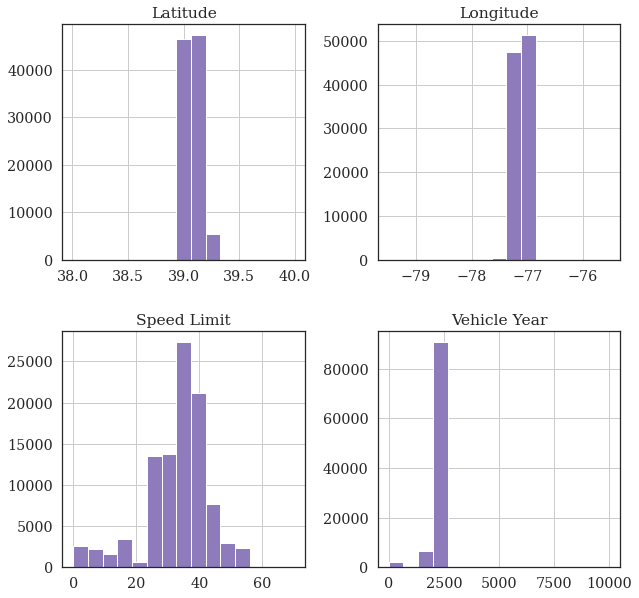

In [16]:
#histograma de distribuciones
sns.set(style = 'white', font_scale=1.3)
plt.rc('font', family='serif')

df[numeric_variables].hist(bins = 15,
                           color = colours[0],
                           figsize = (10,10),
                           )
plt.show()

In [17]:
#valores faltantes de cada variables

# summarize the number of rows with missing values for each column
for i in df[numeric_variables].columns.values:
	# count number of rows with missing values
	n_miss = df[numeric_variables][i].isnull().sum()
	perc = n_miss / df[numeric_variables].shape[0] * 100
	print(i, 'tiene', n_miss , 'valores faltantes, esto quiere decir', perc, ' % del total de los datos\n')

Speed Limit tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Vehicle Year tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Latitude tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Longitude tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos



## Discusión: Variables a profundizar

Muchas de las variables no son relevantes para el caso de los países Latinoamericanos, y a esto nos referimos en la manera de extraer los datos. Con la idea de que los datos lo tendremos que obtener nosotros mismos en el futuro es en que se seleccionan las siguientes variables. El segundo criterio para seleccionarlas es la cantidad de datos faltantes, entre menos datos faltantes, mejor. 

Tomamos esta selección de variables como un primer acercamiento y una exploración un poco más profunda.

In [18]:
#variables categóricas
for i in df[categorical_variables].columns.values:
    print("Valores de ", i,'\n')
    print(df[i].value_counts())
    print('\n\n')

Valores de  ACRS Report Type 

Property Damage Crash    61423
Injury Crash             37652
Fatal Crash                200
Name: ACRS Report Type, dtype: int64



Valores de  Agency Name 

Montgomery County Police     76094
MONTGOMERY                   10659
Rockville Police Departme     5402
Gaithersburg Police Depar     3626
Takoma Park Police Depart     1571
Maryland-National Capital      669
ROCKVILLE                      630
GAITHERSBURG                   390
TAKOMA                         157
MCPARK                          77
Name: Agency Name, dtype: int64



Valores de  Collision Type 

SAME DIR REAR END               34375
STRAIGHT MOVEMENT ANGLE         16343
OTHER                           10731
SINGLE VEHICLE                   8886
SAME DIRECTION SIDESWIPE         8777
HEAD ON LEFT TURN                7612
SAME DIRECTION RIGHT TURN        2162
SAME DIRECTION LEFT TURN         2105
HEAD ON                          2081
OPPOSITE DIRECTION SIDESWIPE     1621
ANGLE MEETS LEFT

99773A28-A039-4C81-B5E1-BE87C467DFC0    1
052D92E9-C976-4753-8920-59AF6B1A1E3C    1
B333B58E-406D-4712-9908-5DECF73F753A    1
93972AED-2846-4D73-8D10-D658C680C6A3    1
0B3CA404-03CC-4320-8EB0-F9F060373388    1
                                       ..
FD9A9234-DAD8-4B4B-8534-6E8C45A4EF1A    1
59344B80-8E15-4367-B3B6-20706CFDEF64    1
255549A9-0F86-4E43-8760-FDDEB32EE828    1
2C8DD471-4E56-4C85-8B81-77CD68AF42E5    1
18D871DA-46F1-44E4-8027-5D67D89407A2    1
Name: Vehicle ID, Length: 99275, dtype: int64



Valores de  Vehicle Make 

TOYOTA         13011
HONDA          10552
FORD           10114
TOYT            5270
NISSAN          4976
               ...  
ORION BUS          1
FREIG              1
GRUMMAN LLV        1
HUNDA              1
HIN                1
Name: Vehicle Make, Length: 1313, dtype: int64



Valores de  Vehicle Model 

4S             9301
TK             6786
CAMRY          3601
ACCORD         3341
COROLLA        3218
               ... 
ED300             1
VAN ODYSSEY  

Las variables que usaremos para las siguientes secciones son las siguientes:
* Latitude
* Longitude
* Crash Date/Time
* Vehicle Year
* ACRS Report Type
* Collision Type
* Driver Distracted By
* Injury Severity
* Light
* Weather
* Vehicle Make
* Vehicle Body Type
* Vehicle Model
* Vehicle Damage Extent


In [19]:
relevant_var = ['Latitude', 'Longitude', 'Vehicle Year', 
                'Crash Date/Time', 'ACRS Report Type', 'Collision Type',
                'Driver Distracted By', 'Injury Severity', 'Light',
                'Weather', 'Vehicle Make', 'Vehicle Body Type',
                'Vehicle Model', 'Vehicle Damage Extent' ]

In [20]:
data = df[relevant_var]
data.head()

Latitude  Longitude  Vehicle Year         Crash Date/Time  \
0  39.044760 -77.052257          2019  09/25/2019 11:20:00 AM   
1  39.044760 -77.052257          2009  09/25/2019 11:20:00 AM   
2  39.090453 -77.050633          2018  09/25/2019 09:58:00 AM   
3  39.090453 -77.050633          2015  09/25/2019 09:58:00 AM   
4  39.073533 -77.111992          2016  09/25/2019 09:50:00 AM   

        ACRS Report Type     Collision Type    Driver Distracted By  \
0  Property Damage Crash  SAME DIR REAR END          NOT DISTRACTED   
1  Property Damage Crash  SAME DIR REAR END       OTHER DISTRACTION   
2           Injury Crash  SAME DIR REAR END          NOT DISTRACTED   
3           Injury Crash  SAME DIR REAR END          NOT DISTRACTED   
4           Injury Crash  HEAD ON LEFT TURN  LOOKED BUT DID NOT SEE   

      Injury Severity     Light Weather Vehicle Make        Vehicle Body Type  \
0  NO APPARENT INJURY  DAYLIGHT   CLEAR        BUICK  (SPORT) UTILITY VEHICLE   
1  NO APPARENT INJURY  DAYLIGHT   CLEAR         ACUR            PASSENGER CAR   
2     POSSIBLE INJURY  DAYLIGHT   CLEAR       TOYOTA            PASSENGER CAR   
3  NO APPARENT INJURY  DAYLIGHT   CLEAR        HONDA  (SPORT) UTILITY VEHICLE   
4  NO APPARENT INJURY  DAYLIGHT   CLEAR         HOND  (SPORT) UTILITY VEHICLE   

  Vehicle Model Vehicle Damage Extent  
0       ENCLAVE             DISABLING  
1            4S             DISABLING  
2         CAMRY             DISABLING  
3           CRV             DISABLING  
4            TK             DISABLING

# Exploración a variables seleccionadas

## Exploración superficial

In [21]:
data.shape

(99275, 14)

In [22]:
data.dtypes

Latitude                 float64
Longitude                float64
Vehicle Year               int64
Crash Date/Time           object
ACRS Report Type          object
Collision Type            object
Driver Distracted By      object
Injury Severity           object
Light                     object
Weather                   object
Vehicle Make              object
Vehicle Body Type         object
Vehicle Model             object
Vehicle Damage Extent     object
dtype: object

In [23]:
# nombre de columnas numéricas
numeric_variables = data._get_numeric_data().columns.values
all_variables = data.columns.values
categorical_variables = np.setdiff1d( all_variables, numeric_variables )

## Modificación de la variable `Crash Date/Time`

La modificación a esta variable serás separar el año, mes, día y hora del día del accidente para un mejor análisis y para la entrada al modelo.

In [24]:
sep_fecha_hora = data['Crash Date/Time'].str.split( ' ', expand = True )
sep_fecha_hora

0         1   2
0      09/25/2019  11:20:00  AM
1      09/25/2019  11:20:00  AM
2      09/25/2019  09:58:00  AM
3      09/25/2019  09:58:00  AM
4      09/25/2019  09:50:00  AM
...           ...       ...  ..
99270  01/01/2015  01:14:00  AM
99271  01/01/2015  01:10:00  AM
99272  01/01/2015  01:10:00  AM
99273  01/01/2015  12:30:00  AM
99274  01/01/2015  12:30:00  AM

[99275 rows x 3 columns]

In [25]:
#separamos año, mes y día
sep_MMDDAAAA = sep_fecha_hora.iloc[:,0].str.split('/', expand = True)
sep_MMDDAAAA

0   1     2
0      09  25  2019
1      09  25  2019
2      09  25  2019
3      09  25  2019
4      09  25  2019
...    ..  ..   ...
99270  01  01  2015
99271  01  01  2015
99272  01  01  2015
99273  01  01  2015
99274  01  01  2015

[99275 rows x 3 columns]

In [26]:
#separamos hora, minuto y segundo
sep_hhmmss = sep_fecha_hora.iloc[:,1].str.split(':', expand = True)
sep_hhmmss

0   1   2
0      11  20  00
1      11  20  00
2      09  58  00
3      09  58  00
4      09  50  00
...    ..  ..  ..
99270  01  14  00
99271  01  10  00
99272  01  10  00
99273  12  30  00
99274  12  30  00

[99275 rows x 3 columns]

In [27]:
#concatenamos las separaciones en el sep_fecha_hora
fecha_hora = pd.concat( [sep_MMDDAAAA, sep_hhmmss], axis = 1 ).set_axis( ['Month', 'Day', 'Year', 'Hour', 'Minute', 'Seconds'], axis = 1, inplace = False )
fecha_hora

Month Day  Year Hour Minute Seconds
0        09  25  2019   11     20      00
1        09  25  2019   11     20      00
2        09  25  2019   09     58      00
3        09  25  2019   09     58      00
4        09  25  2019   09     50      00
...     ...  ..   ...  ...    ...     ...
99270    01  01  2015   01     14      00
99271    01  01  2015   01     10      00
99272    01  01  2015   01     10      00
99273    01  01  2015   12     30      00
99274    01  01  2015   12     30      00

[99275 rows x 6 columns]

Se cuenta con una columna que nos dicen si fue **am** o **pm**, para eso vamos a usar una función que nos mueva la hora a formato de **24 h**

In [28]:
def change_time(series_number, series_string):
    time_changed = []
    #revisar si es AM o PM
    for i in range(len(series_number)):
        if series_string.values[i] == 'AM':
            #si es AM, revisar si el un 12
            if int(series_number.values[i]) == 12:
                #si son las 12 AM, entonces son las 0 h
                time_changed.append(0)
            #si no son las 12 AM, se conserva el número
            else:
                time_changed.append( int( series_number.values[i] ) )
        #si no es AM entonces es PM
        else:
        #si es PM revisar si son las 12 PM
            if int(series_number.values[i]) == 12:
                #si son las 12 PM, entonces son las 12 h
                time_changed.append( int(series_number.values[i]) )
            else:
                #de no ser las 12 PM -> se le aumentan 12 h: 1:00 PM == 13:00 h
                time_changed.append( int( series_number.values[i] ) + 12 )
    return np.array(time_changed)

In [29]:
numbers = sep_hhmmss.iloc[:,0]
tiempos = sep_fecha_hora.iloc[:,2]

In [30]:
fecha_hora['Hour'] = change_time(series_number= numbers, series_string= tiempos)

In [31]:
fecha_hora

Month Day  Year  Hour Minute Seconds
0        09  25  2019    11     20      00
1        09  25  2019    11     20      00
2        09  25  2019     9     58      00
3        09  25  2019     9     58      00
4        09  25  2019     9     50      00
...     ...  ..   ...   ...    ...     ...
99270    01  01  2015     1     14      00
99271    01  01  2015     1     10      00
99272    01  01  2015     1     10      00
99273    01  01  2015     0     30      00
99274    01  01  2015     0     30      00

[99275 rows x 6 columns]

In [32]:
#concatenamos en data
data = pd.concat( [data, fecha_hora], axis = 1 )

In [33]:
#eliminamos la varibale CRASH DATE/TIME, MINUTES y SECONDS
data.drop(columns= ['Crash Date/Time', 'Minute', 'Seconds'], inplace = True)

Antes de continuar podemos ver que las nuevas variables **no son numéricas**

In [34]:
data.dtypes

Latitude                 float64
Longitude                float64
Vehicle Year               int64
ACRS Report Type          object
Collision Type            object
Driver Distracted By      object
Injury Severity           object
Light                     object
Weather                   object
Vehicle Make              object
Vehicle Body Type         object
Vehicle Model             object
Vehicle Damage Extent     object
Month                     object
Day                       object
Year                      object
Hour                       int32
dtype: object

Vamos a transformarlas a variables numéricas

In [35]:
data['Month'] = pd.to_numeric(data.Month) 
data['Day'] = pd.to_numeric(data.Day)
data['Year'] = pd.to_numeric(data.Year)

In [36]:
data.dtypes

Latitude                 float64
Longitude                float64
Vehicle Year               int64
ACRS Report Type          object
Collision Type            object
Driver Distracted By      object
Injury Severity           object
Light                     object
Weather                   object
Vehicle Make              object
Vehicle Body Type         object
Vehicle Model             object
Vehicle Damage Extent     object
Month                      int64
Day                        int64
Year                       int64
Hour                       int32
dtype: object

In [37]:
#actualizar las variables categóricas y numéricas
numeric_variables = data._get_numeric_data().columns.values
all_variables = data.columns.values
categorical_variables = np.setdiff1d( all_variables, numeric_variables )

## Datos faltantes y sospechosas

In [38]:
#valores faltantes (porcentaje)
missing_values = data.isnull().sum()

# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values.sum()

# percent of data that is missing
perc_nan_rows = (total_missing/total_cells) * 100

print('Contamos con',perc_nan_rows, ' % de filas con MÍNIMO un dato faltante' )

Contamos con 0.6283200260713704  % de filas con MÍNIMO un dato faltante


### Datos faltantes y sospechosos: Variables numéricas

In [39]:
# summarize the number of rows with missing values for each column
for i in data[numeric_variables].columns.values:
	# count number of rows with missing values
	n_miss = data[numeric_variables][i].isnull().sum()
	perc = n_miss / data[numeric_variables].shape[0] * 100
	print(i, 'tiene', n_miss , 'valores faltantes, esto quiere decir', perc, ' % del total de los datos\n')

Latitude tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Longitude tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Vehicle Year tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Month tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Day tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Year tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Hour tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos



No contamos con variables faltantes, pero eso no significa que tengamos datos óptimos

In [40]:
mask_future = data['Vehicle Year'] > 2021
mask_past = data['Vehicle Year'] < 1970

In [41]:
data[ mask_future ]

Latitude  Longitude  Vehicle Year       ACRS Report Type  \
4353   39.070452 -77.113967          8888           Injury Crash   
4524   39.027782 -77.076083          9999  Property Damage Crash   
4805   39.008660 -77.040429          9999           Injury Crash   
7774   39.105620 -77.193430          9999  Property Damage Crash   
8054   39.126862 -77.173572          2914  Property Damage Crash   
...          ...        ...           ...                    ...   
95824  39.000730 -77.096867          9999  Property Damage Crash   
96261  39.046910 -77.112658          9999  Property Damage Crash   
97322  39.044488 -77.111988          9999  Property Damage Crash   
97918  38.983849 -77.089831          9999  Property Damage Crash   
98295  39.142207 -77.193563          9999  Property Damage Crash   

                     Collision Type Driver Distracted By     Injury Severity  \
4353                          OTHER              UNKNOWN  NO APPARENT INJURY   
4524              SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
4805              SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
7774                        UNKNOWN              UNKNOWN  NO APPARENT INJURY   
8054   OPPOSITE DIRECTION SIDESWIPE       NOT DISTRACTED  NO APPARENT INJURY   
...                             ...                  ...                 ...   
95824             SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
96261       SAME DIR REND LEFT TURN       NOT DISTRACTED  NO APPARENT INJURY   
97322             SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
97918                         OTHER              UNKNOWN  NO APPARENT INJURY   
98295        ANGLE MEETS RIGHT TURN              UNKNOWN  NO APPARENT INJURY   

                Light  Weather Vehicle Make        Vehicle Body Type  \
4353             DAWN    CLEAR          UNK            PASSENGER CAR   
4524   DARK LIGHTS ON    CLEAR        HONDA  (SPORT) UTILITY VEHICLE   
4805   DARK LIGHTS ON  RAINING         FORD            PASSENGER CAR   
7774          UNKNOWN    CLEAR           99      AMBULANCE/EMERGENCY   
8054         DAYLIGHT  RAINING         GILL              TRANSIT BUS   
...               ...      ...          ...                      ...   
95824  DARK LIGHTS ON    CLEAR          BMW            PASSENGER CAR   
96261        DAYLIGHT    CLEAR         JEEP                  UNKNOWN   
97322        DAYLIGHT    CLEAR     HYUN/HON  (SPORT) UTILITY VEHICLE   
97918         UNKNOWN  RAINING           UU            PASSENGER CAR   
98295  DARK LIGHTS ON    CLEAR      UNKNOWN             PICKUP TRUCK   

        Vehicle Model Vehicle Damage Extent  Month  Day  Year  Hour  
4353            SEDAN            FUNCTIONAL      7    3  2019     6  
4524            PILOT           SUPERFICIAL      6   29  2019    22  
4805   CROWN VICTORIA           SUPERFICIAL      6   25  2019     2  
7774               99               UNKNOWN      5    7  2019     7  
8054              BUS           SUPERFICIAL      5    2  2019    15  
...               ...                   ...    ...  ...   ...   ...  
95824         UNKNOWN               UNKNOWN      3    7  2015     1  
96261        WRANGLER               UNKNOWN      2   26  2015    10  
97322             UNK               UNKNOWN      2    7  2015    14  
97918              UU               UNKNOWN      1   26  2015    18  
98295         UNKNOWN               UNKNOWN      1   19  2015    21  

[71 rows x 17 columns]

Contamos con autos del futuro

In [42]:
data[mask_past]

Latitude  Longitude  Vehicle Year       ACRS Report Type  \
23     39.020048 -77.011397             0  Property Damage Crash   
33     39.070135 -77.195130             0  Property Damage Crash   
112    39.091697 -77.079318             0  Property Damage Crash   
177    38.986951 -77.094861             0           Injury Crash   
182    39.311676 -77.238629             0           Injury Crash   
...          ...        ...           ...                    ...   
98976  39.068337 -77.061052             0           Injury Crash   
99018  39.085060 -77.078553             0           Injury Crash   
99126  39.047102 -77.227060             0  Property Damage Crash   
99242  39.129494 -77.163956             0  Property Damage Crash   
99256  39.033542 -77.147553             0  Property Damage Crash   

                 Collision Type Driver Distracted By     Injury Severity  \
23                      UNKNOWN              UNKNOWN  NO APPARENT INJURY   
33               SINGLE VEHICLE              UNKNOWN  NO APPARENT INJURY   
112                       OTHER              UNKNOWN  NO APPARENT INJURY   
177              SINGLE VEHICLE       NOT DISTRACTED  NO APPARENT INJURY   
182    SAME DIRECTION SIDESWIPE              UNKNOWN  NO APPARENT INJURY   
...                         ...                  ...                 ...   
98976         SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
99018         SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
99126                   HEAD ON              UNKNOWN  NO APPARENT INJURY   
99242                     OTHER              UNKNOWN  NO APPARENT INJURY   
99256                   UNKNOWN              UNKNOWN  NO APPARENT INJURY   

                Light Weather Vehicle Make        Vehicle Body Type  \
23           DAYLIGHT     NaN      UNKNOWN                      NaN   
33            UNKNOWN     NaN      UNKNOWN                      NaN   
112           UNKNOWN     NaN      UNKNOWN                  UNKNOWN   
177          DAYLIGHT   CLEAR        HONDA            PASSENGER CAR   
182    DARK NO LIGHTS   CLEAR      UNKNOWN                  UNKNOWN   
...               ...     ...          ...                      ...   
98976        DAYLIGHT  CLOUDY           UU                  UNKNOWN   
99018        DAYLIGHT    SNOW      UNKNOWN                  UNKNOWN   
99126             NaN   FOGGY      UNKNOWN  (SPORT) UTILITY VEHICLE   
99242        DAYLIGHT   CLEAR      UNKNOWN                  UNKNOWN   
99256         UNKNOWN   CLEAR           UU                  UNKNOWN   

      Vehicle Model Vehicle Damage Extent  Month  Day  Year  Hour  
23          UNKNOWN               UNKNOWN      9   24  2019    17  
33          UNKNOWN               UNKNOWN      9   24  2019    12  
112         UNKNOWN               UNKNOWN      9   22  2019     4  
177             CRV               UNKNOWN      9   20  2019    10  
182         UNKNOWN               UNKNOWN      9   20  2019     6  
...             ...                   ...    ...  ...   ...   ...  
98976            UU               UNKNOWN      1    6  2015    12  
99018       UNKNOWN               UNKNOWN      1    6  2015     8  
99126       UNKNOWN            FUNCTIONAL      1    4  2015     7  
99242       UNKNOWN               UNKNOWN      1    1  2015    16  
99256            UU            FUNCTIONAL      1    1  2015    10  

[2150 rows x 17 columns]

Y tambien autos del pasado... muy atrás en el tiempo

Estos son errores humanos, por lo que no deben de asustarnos. Vamos a sustituir esos valores con ayuda del algoritmo de _K-Nearest Neighbors_

In [43]:
#creamos dataframe con estas aberraciones del tiempo
data_futureCars = data[ mask_future]
data_OldCars = data[mask_past]

#concatenamos la infromacion
data_timetravelCars = pd.concat( [data_futureCars, data_OldCars], axis=0 )

#actualizamos data para que no tenga valores sospechosos
data = data[ (mask_past == False) & (mask_future == False) ]

print("Contamos con", data_timetravelCars.shape[0], "aberraciones del tiempo")

Contamos con 2221 aberraciones del tiempo


In [44]:
#remplazamos los datos del año por nan
data_timetravelCars['Vehicle Year'] = np.array( [np.nan]*data_timetravelCars.shape[0] )

# concatenamos con el data frame normal
data = pd.concat( [data,data_timetravelCars], axis=0 )

#### `KNNImputer` en datos sospechosos

In [45]:
from sklearn.impute import KNNImputer

In [46]:
data.columns

Index(['Latitude', 'Longitude', 'Vehicle Year', 'ACRS Report Type',
       'Collision Type', 'Driver Distracted By', 'Injury Severity', 'Light',
       'Weather', 'Vehicle Make', 'Vehicle Body Type', 'Vehicle Model',
       'Vehicle Damage Extent', 'Month', 'Day', 'Year', 'Hour'],
      dtype='object')

In [47]:
X = data[ ['Latitude', 'Longitude' ,'Vehicle Year', 'Month', 'Day', 'Year', 'Hour'] ].values

imputer = KNNImputer( n_neighbors= 10, 
                     weights= 'uniform',
                     metric= 'nan_euclidean',
                    )

#ajustar a nuestros datos
imputer.fit(X)

#estimar valores
X_transformed = imputer.transform(X)

In [48]:
X_transformed

array([[ 3.90447600e+01, -7.70522567e+01,  2.01900000e+03, ...,
         2.50000000e+01,  2.01900000e+03,  1.10000000e+01],
       [ 3.90447600e+01, -7.70522567e+01,  2.00900000e+03, ...,
         2.50000000e+01,  2.01900000e+03,  1.10000000e+01],
       [ 3.90904533e+01, -7.70506333e+01,  2.01800000e+03, ...,
         2.50000000e+01,  2.01900000e+03,  9.00000000e+00],
       ...,
       [ 3.90471017e+01, -7.72270600e+01,  2.00690000e+03, ...,
         4.00000000e+00,  2.01500000e+03,  7.00000000e+00],
       [ 3.91294943e+01, -7.71639562e+01,  2.00240000e+03, ...,
         1.00000000e+00,  2.01500000e+03,  1.60000000e+01],
       [ 3.90335417e+01, -7.71475533e+01,  2.00780000e+03, ...,
         1.00000000e+00,  2.01500000e+03,  1.00000000e+01]])

In [49]:
data[ ['Latitude', 'Longitude' ,'Vehicle Year', 'Month', 'Day', 'Year', 'Hour'] ] = X_transformed

In [50]:
data.isnull().sum()

Latitude                    0
Longitude                   0
Vehicle Year                0
ACRS Report Type            0
Collision Type            330
Driver Distracted By        0
Injury Severity             0
Light                     832
Weather                  7791
Vehicle Make               20
Vehicle Body Type        1400
Vehicle Model              48
Vehicle Damage Extent     183
Month                       0
Day                         0
Year                        0
Hour                        0
dtype: int64

No todo es felicidad, contamos con años promedios, cuando realmente queremos años enteros, entonces vamos a redondearlos

In [51]:
data['Vehicle Year'] = data['Vehicle Year'].apply(int)

### Datos faltantes y sospechosos: Variables categóricas

#### Variables faltantes

In [52]:
# summarize the number of rows with missing values for each column
for i in data[categorical_variables].columns.values:
	# count number of rows with missing values
	n_miss = data[categorical_variables][i].isnull().sum()
	perc = n_miss / data[categorical_variables].shape[0] * 100
	print(i, 'tiene', n_miss , 'valores faltantes, esto quiere decir', perc, ' % del total de los datos\n')

ACRS Report Type tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Collision Type tiene 330 valores faltantes, esto quiere decir 0.33240997229916897  % del total de los datos

Driver Distracted By tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Injury Severity tiene 0 valores faltantes, esto quiere decir 0.0  % del total de los datos

Light tiene 832 valores faltantes, esto quiere decir 0.8380760513724503  % del total de los datos

Vehicle Body Type tiene 1400 valores faltantes, esto quiere decir 1.4102241249055654  % del total de los datos

Vehicle Damage Extent tiene 183 valores faltantes, esto quiere decir 0.1843364391840846  % del total de los datos

Vehicle Make tiene 20 valores faltantes, esto quiere decir 0.020146058927222363  % del total de los datos

Vehicle Model tiene 48 valores faltantes, esto quiere decir 0.04835054142533367  % del total de los datos

Weather tiene 7791 valores faltantes, esto quiere decir 7.84789725509

In [53]:
data.dropna(axis=0, how='any', inplace=True)

In [54]:
data.isnull().sum()

Latitude                 0
Longitude                0
Vehicle Year             0
ACRS Report Type         0
Collision Type           0
Driver Distracted By     0
Injury Severity          0
Light                    0
Weather                  0
Vehicle Make             0
Vehicle Body Type        0
Vehicle Model            0
Vehicle Damage Extent    0
Month                    0
Day                      0
Year                     0
Hour                     0
dtype: int64

#### Variables sospechosas

Como se dijo antes, que las variables faltantes sean cero, no quiere decir que tengamos datos con calidad pasable. Podemos observar algo interesante en la variable `Vehicle Make`.

In [55]:
mask_VehicleMake1 = data['Vehicle Make'] == '99'
mask_VehicleMake2 = data['Vehicle Make'] == '00'

In [56]:
data[mask_VehicleMake1]

Latitude  Longitude  Vehicle Year       ACRS Report Type  \
20370  39.128763 -77.166642          1999  Property Damage Crash   
48727  39.106543 -77.148153          1999           Injury Crash   
59662  38.976951 -77.090603          2016  Property Damage Crash   
7774   39.105620 -77.193430          2011  Property Damage Crash   
66624  39.055839 -77.118899          2007  Property Damage Crash   
80621  39.060360 -77.049272          2006  Property Damage Crash   
85806  38.994081 -77.036369          2009  Property Damage Crash   
86680  39.042968 -77.094250          2006  Property Damage Crash   
87477  38.990042 -77.096842          2008  Property Damage Crash   
90798  39.049510 -77.114303          2004  Property Damage Crash   
94378  39.074461 -76.954787          2007  Property Damage Crash   
94792  38.989952 -77.096852          2005  Property Damage Crash   
95172  39.081082 -77.144772          2007           Injury Crash   
95714  38.972956 -77.089734          2006  Property Damage Crash   
96207  38.978244 -77.076838          2007  Property Damage Crash   
98290  39.169431 -77.190639          2004           Injury Crash   

                 Collision Type Driver Distracted By     Injury Severity  \
20370         SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
48727         SAME DIR REAR END              UNKNOWN     POSSIBLE INJURY   
59662  SAME DIRECTION SIDESWIPE       NOT DISTRACTED  NO APPARENT INJURY   
7774                    UNKNOWN              UNKNOWN  NO APPARENT INJURY   
66624                     OTHER              UNKNOWN  NO APPARENT INJURY   
80621   STRAIGHT MOVEMENT ANGLE              UNKNOWN  NO APPARENT INJURY   
85806  SAME DIRECTION SIDESWIPE       NOT DISTRACTED  NO APPARENT INJURY   
86680                   UNKNOWN              UNKNOWN  NO APPARENT INJURY   
87477         SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
90798                   UNKNOWN              UNKNOWN  NO APPARENT INJURY   
94378  SAME DIRECTION SIDESWIPE    NO DRIVER PRESENT  NO APPARENT INJURY   
94792         SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
95172         SAME DIR REAR END              UNKNOWN  NO APPARENT INJURY   
95714  SAME DIRECTION SIDESWIPE              UNKNOWN  NO APPARENT INJURY   
96207  SAME DIRECTION SIDESWIPE       NOT DISTRACTED  NO APPARENT INJURY   
98290            SINGLE VEHICLE              UNKNOWN  NO APPARENT INJURY   

                Light  Weather Vehicle Make  \
20370        DAYLIGHT    CLEAR           99   
48727        DAYLIGHT  RAINING           99   
59662        DAYLIGHT    CLEAR           99   
7774          UNKNOWN    CLEAR           99   
66624        DAYLIGHT    CLEAR           99   
80621        DAYLIGHT    CLEAR           99   
85806        DAYLIGHT    CLEAR           99   
86680         UNKNOWN  UNKNOWN           99   
87477  DARK LIGHTS ON   CLOUDY           99   
90798        DAYLIGHT    CLEAR           99   
94378        DAYLIGHT  RAINING           99   
94792  DARK LIGHTS ON   CLOUDY           99   
95172  DARK LIGHTS ON    CLEAR           99   
95714            DAWN    CLEAR           99   
96207        DAYLIGHT    CLEAR           99   
98290  DARK LIGHTS ON    CLEAR           99   

                                       Vehicle Body Type Vehicle Model  \
20370                                      PASSENGER CAR            99   
48727                                      PASSENGER CAR            99   
59662                            (SPORT) UTILITY VEHICLE            99   
7774                                 AMBULANCE/EMERGENCY            99   
66624                                                VAN            99   
80621                                      PASSENGER CAR            99   
85806                                      PASSENGER CAR            99   
86680                                            UNKNOWN            99   
87477                                      PASSENGER CAR            99   
90798             

In [57]:
data[mask_VehicleMake2]

Latitude  Longitude  Vehicle Year       ACRS Report Type  \
52569  38.996473 -77.029027          2017  Property Damage Crash   
22269  39.110769 -77.154967          2011  Property Damage Crash   
58713  38.998575 -76.994797          2009  Property Damage Crash   
61951  39.158734 -77.452240          2008           Injury Crash   
84861  39.099923 -77.159932          2008  Property Damage Crash   
85211  39.192612 -77.277040          2007           Injury Crash   
86152  38.995392 -76.991283          2008           Injury Crash   
86875  39.067867 -77.261202          2003  Property Damage Crash   
87126  39.059100 -76.969228          2006           Injury Crash   
87850  38.989185 -77.093787          2008           Injury Crash   
94310  39.263922 -77.218933          2008           Injury Crash   

                 Collision Type                    Driver Distracted By  \
52569  SAME DIRECTION SIDESWIPE                                 UNKNOWN   
22269                     OTHER                                 UNKNOWN   
58713         SAME DIR REAR END                          NOT DISTRACTED   
61951            SINGLE VEHICLE                          NOT DISTRACTED   
84861                     OTHER                                 UNKNOWN   
85211   STRAIGHT MOVEMENT ANGLE                                 UNKNOWN   
86152            SINGLE VEHICLE  TALKING OR LISTENING TO CELLULAR PHONE   
86875                     OTHER                                 UNKNOWN   
87126                     OTHER                                 UNKNOWN   
87850  SAME DIRECTION SIDESWIPE                                 UNKNOWN   
94310         SAME DIR REAR END                                 UNKNOWN   

                Injury Severity           Light  Weather Vehicle Make  \
52569        NO APPARENT INJURY        DAYLIGHT    CLEAR           00   
22269        NO APPARENT INJURY        DAYLIGHT    CLEAR           00   
58713        NO APPARENT INJURY        DAYLIGHT   CLOUDY           00   
61951  SUSPECTED SERIOUS INJURY        DAYLIGHT    CLEAR           00   
84861        NO APPARENT INJURY  DARK LIGHTS ON    CLEAR           00   
85211        NO APPARENT INJURY  DARK LIGHTS ON    CLEAR           00   
86152        NO APPARENT INJURY        DAYLIGHT    CLEAR           00   
86875        NO APPARENT INJURY        DAYLIGHT    CLEAR           00   
87126        NO APPARENT INJURY  DARK LIGHTS ON  RAINING           00   
87850    SUSPECTED MINOR INJURY        DAYLIGHT    CLEAR           00   
94310        NO APPARENT INJURY        DAYLIGHT    CLEAR           00   

                                      Vehicle Body Type Vehicle Model  \
52569                                     PASSENGER CAR            00   
22269                                     PASSENGER CAR            00   
58713                                     PASSENGER CAR            00   
61951                                             OTHER     QUAD BIKE   
84861                                     PASSENGER CAR            00   
85211                                      PICKUP TRUCK            00   
86152  OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)            00   
86875                           (SPORT) UTILITY VEHICLE            00   
87126                                           UNKNOWN            00   
87850                                     PASSENGER CAR            00   
94310                                     PASSENGER CAR            00   

      Vehicle Damage Extent  Month   Day    Year  Hour  
52569               UNKNOWN    3.0  28.0  2017.0   7.0  
22269            FUNCTIONAL    9.0   4.0  2018.0  14.0  
58713             NO DAMAGE   12.0   7.0  2016.0   8.0  
61951           SUPERFICIAL   10.0  18.0  2016.0  15.0  
84861               UNKNOWN    9.0  30.0  2015.0  21.0  
85211            FUNCTIONAL    9.0  24.0  2015.0  22.0  
86152             NO DAMAGE    9.0  10.0  2015.0   8.0  
86875               UNKNOWN    8.0  27.0  2015.0  10.0  
87126               UNK

Valores que no podemos estimar y que es mejor eliminarlos

In [58]:
data['Vehicle Make'].replace('99', np.nan, inplace = True)
data['Vehicle Make'].replace('00', np.nan, inplace = True)

In [59]:
data.isnull().sum()

Latitude                  0
Longitude                 0
Vehicle Year              0
ACRS Report Type          0
Collision Type            0
Driver Distracted By      0
Injury Severity           0
Light                     0
Weather                   0
Vehicle Make             27
Vehicle Body Type         0
Vehicle Model             0
Vehicle Damage Extent     0
Month                     0
Day                       0
Year                      0
Hour                      0
dtype: int64

In [60]:
data.dropna(axis=0, how='any', inplace= True)

In [61]:
data.isnull().sum()

Latitude                 0
Longitude                0
Vehicle Year             0
ACRS Report Type         0
Collision Type           0
Driver Distracted By     0
Injury Severity          0
Light                    0
Weather                  0
Vehicle Make             0
Vehicle Body Type        0
Vehicle Model            0
Vehicle Damage Extent    0
Month                    0
Day                      0
Year                     0
Hour                     0
dtype: int64

## Exploración de variables numéricas

In [62]:
data[numeric_variables]

Latitude  Longitude  Vehicle Year  Month   Day    Year  Hour
0      39.044760 -77.052257          2019    9.0  25.0  2019.0  11.0
1      39.044760 -77.052257          2009    9.0  25.0  2019.0  11.0
2      39.090453 -77.050633          2018    9.0  25.0  2019.0   9.0
3      39.090453 -77.050633          2015    9.0  25.0  2019.0   9.0
4      39.073533 -77.111992          2016    9.0  25.0  2019.0   9.0
...          ...        ...           ...    ...   ...     ...   ...
98748  38.986078 -77.117035          2005    1.0  10.0  2015.0  15.0
98976  39.068337 -77.061052          2006    1.0   6.0  2015.0  12.0
99018  39.085060 -77.078553          2007    1.0   6.0  2015.0   8.0
99242  39.129494 -77.163956          2002    1.0   1.0  2015.0  16.0
99256  39.033542 -77.147553          2007    1.0   1.0  2015.0  10.0

[89240 rows x 7 columns]

### _Heat Map_

Una manera de poder visualizar estos datos es através de un mapa de calor o mejor conocido como _Heat Map_ ya que de esta manera podemos ver las zonas donde más accidentes se han registrado.

In [63]:
#datos de latitud y longitud
data_loc = data[ ['Latitude', 'Longitude'] ].to_numpy()

import folium 

mapa = folium.Map( location=(data.Latitude.mean(), data.Longitude.mean()), zoom_start=12 )

from folium.plugins import HeatMap

HeatMap( data_loc, 
        radius=10, 
        max_val=0.8,
        min_opacity=0.2,
        blur=8
       ).add_to(mapa)

mapa

### Año del auto

La siguiente gráfica nos muestra el año del auto que más tuvo registros de accidentes.

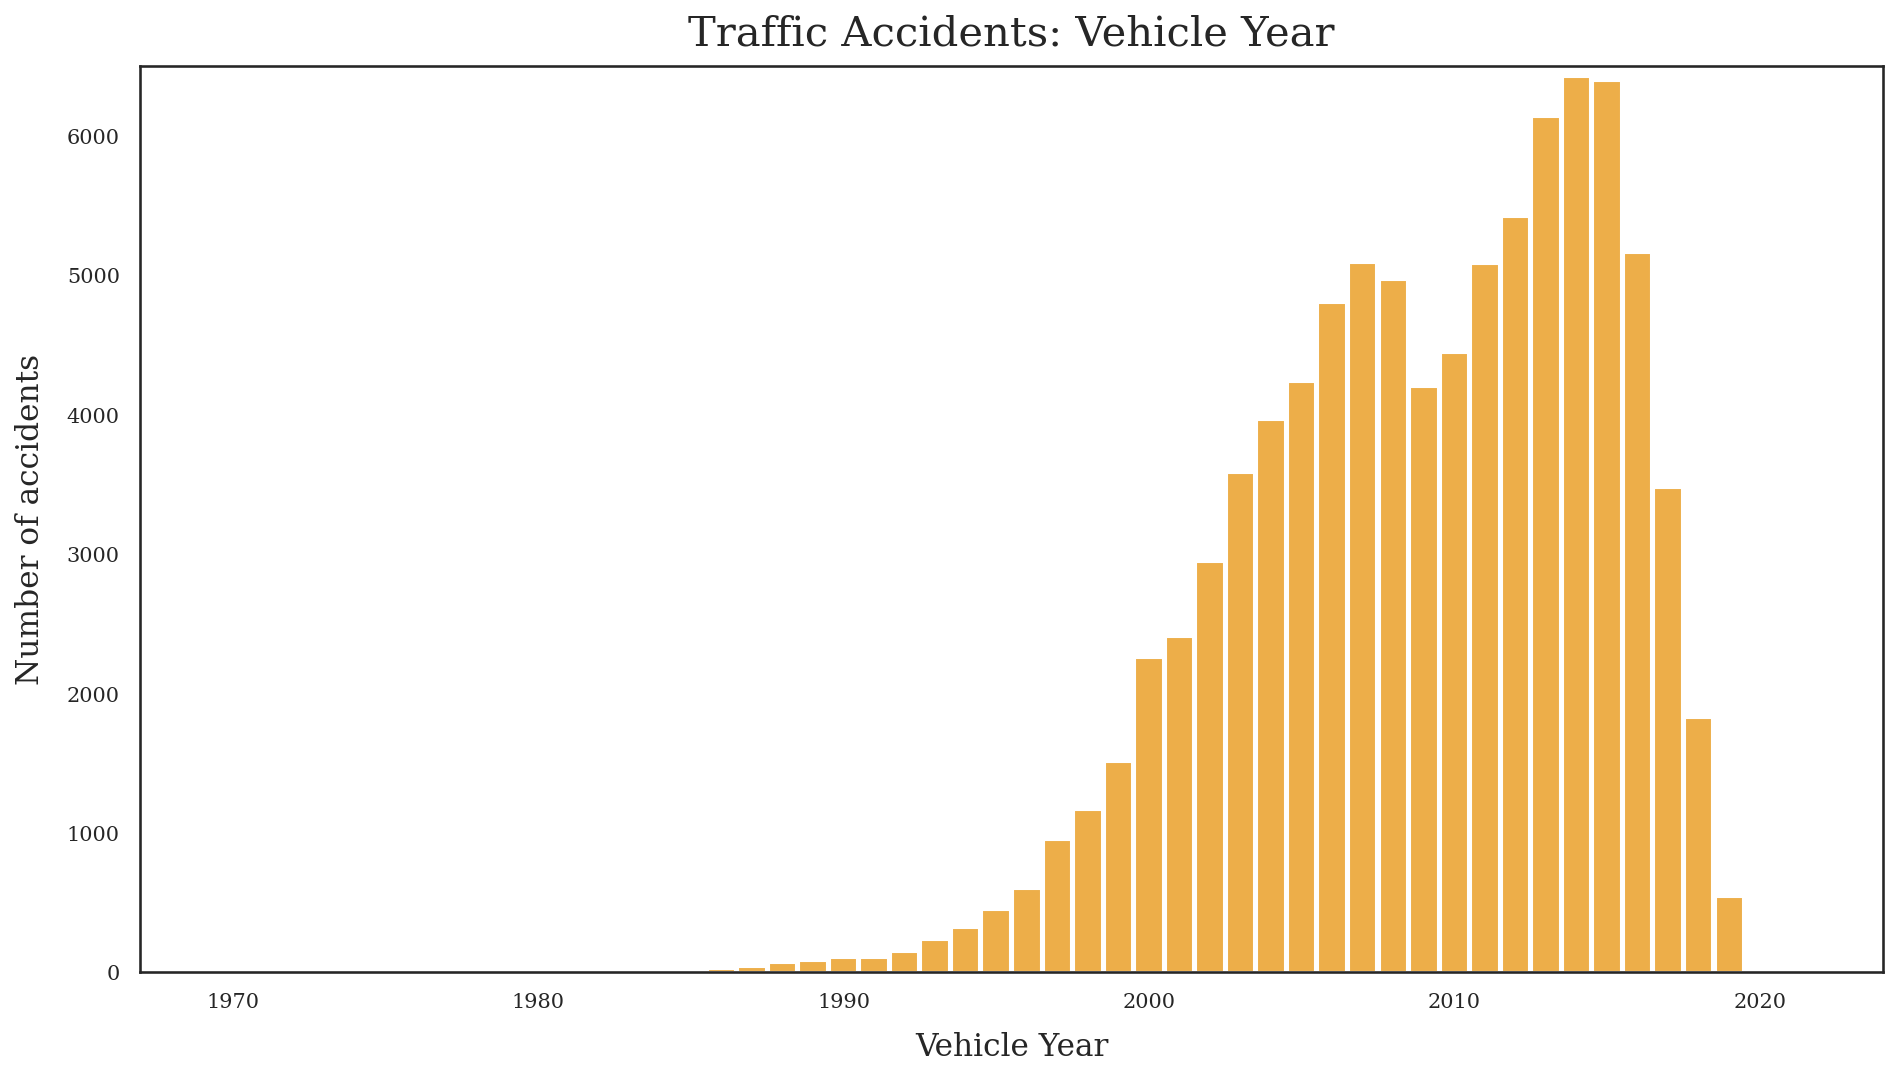

In [64]:
sns.set(style = 'white',
        #font_scale= 1.5
        )
plt.rc('font', family='serif')

plt.figure(figsize=(15,8),
           dpi = 150
           )

plt.bar( x = data['Vehicle Year'].value_counts().index.values,
        height = data['Vehicle Year'].value_counts().values,
        width = 0.9,
        color = colours[2],
        )

#pimp my barchart

plt.title('Traffic Accidents: Vehicle Year', size = 20, pad = 10)
plt.xlabel('Vehicle Year', labelpad = 10, size = 15)
plt.ylabel( 'Number of accidents', labelpad = 10, size = 15 )
plt.tick_params(labelsize = 10)
plt.ylim(0, 6500)



plt.show()

Podemos notar que hay un alto número de accidentes para los modelos de la última década y vemos los modelos del 2010 se comporta como un mínimo local o un parte aguas.

### Accidentes a través del tiempo

#### Años y el número de accidentes.

Contamos con los registros que van del 2015 hasta Septiembre del 2019, con esto podemos observar como va el comportamiento de los accidentes al paso del tiempo.

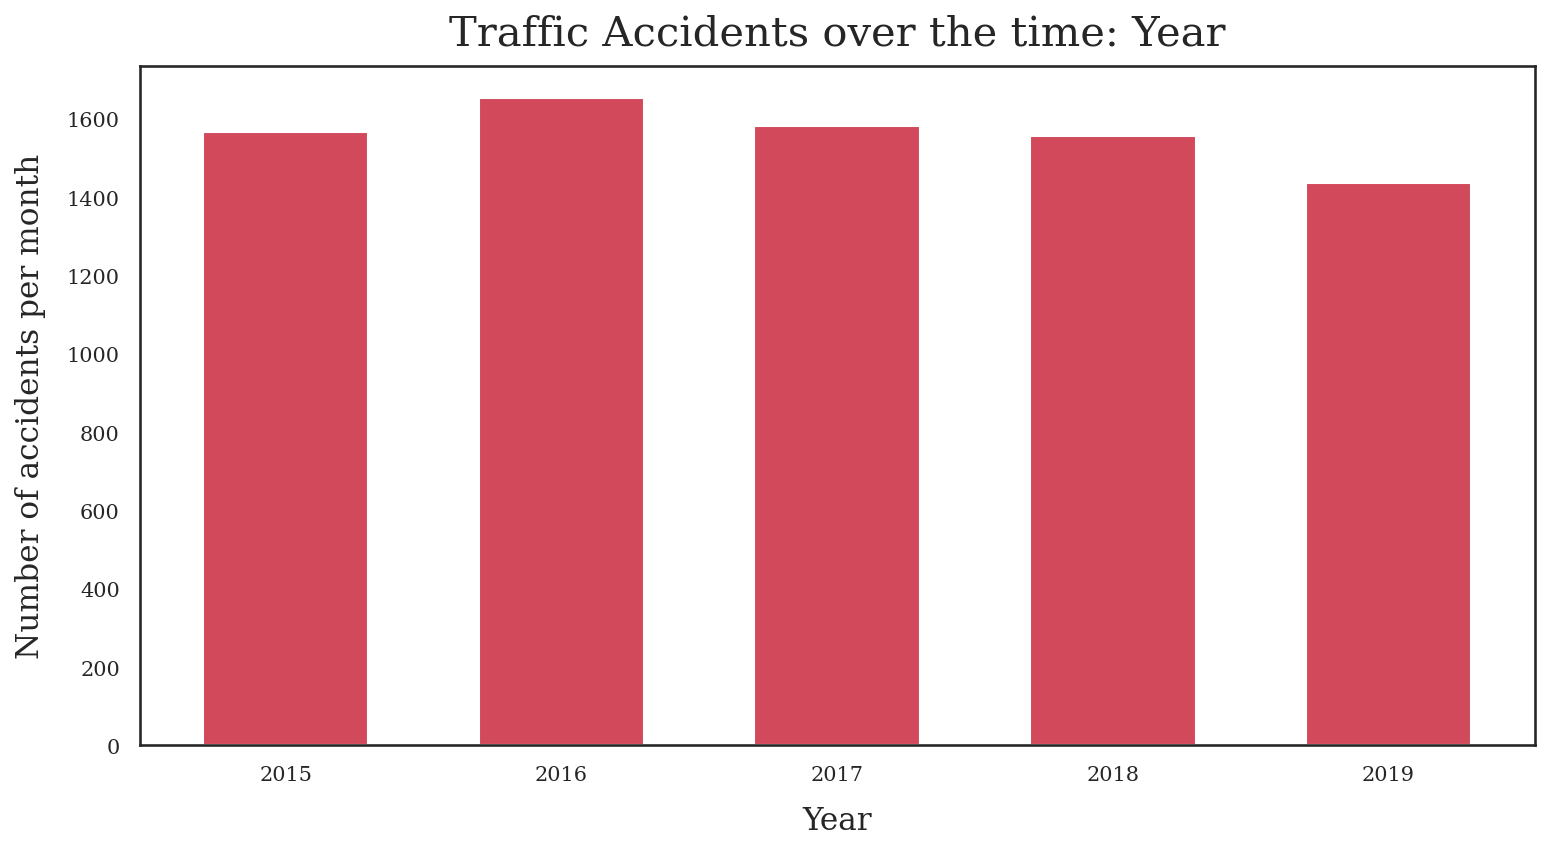

In [65]:
#graficaremos un promedio de accidentes por año en los debidos meses para tener un punto de comparación
accidents_per_month=[]

for i in range(5):
    if i == 4 :
        #no contamos con los datos de los meses de octubre, noviembre y diciembre para el año 2019
        accidents_per_month.append(data.groupby(by='Year').count().Latitude.values[i]/9)
    else:
        accidents_per_month.append(data.groupby(by='Year').count().Latitude.values[i]/12)

sns.set(style = 'white',
        #font_scale= 1.5
        )
plt.rc('font', family='serif')

plt.figure(figsize=(12,6),
           dpi = 150
           )

plt.bar( x = data.groupby(by='Year').count().index.values,
        height = accidents_per_month,
        width = 0.6,
        color = colours[3],
        )

#pimp my barchart

plt.title('Traffic Accidents over the time: Year', size = 20, pad = 10)
plt.xlabel('Year', labelpad = 10, size = 15)
plt.ylabel( 'Number of accidents per month', labelpad = 10, size = 15 )
plt.tick_params(labelsize = 10)
#plt.ylim(0, 6500)


plt.show()

#### Meses y el número de accidentes

A través de los años, ¿cuáles han sido los meses más problemáticos?

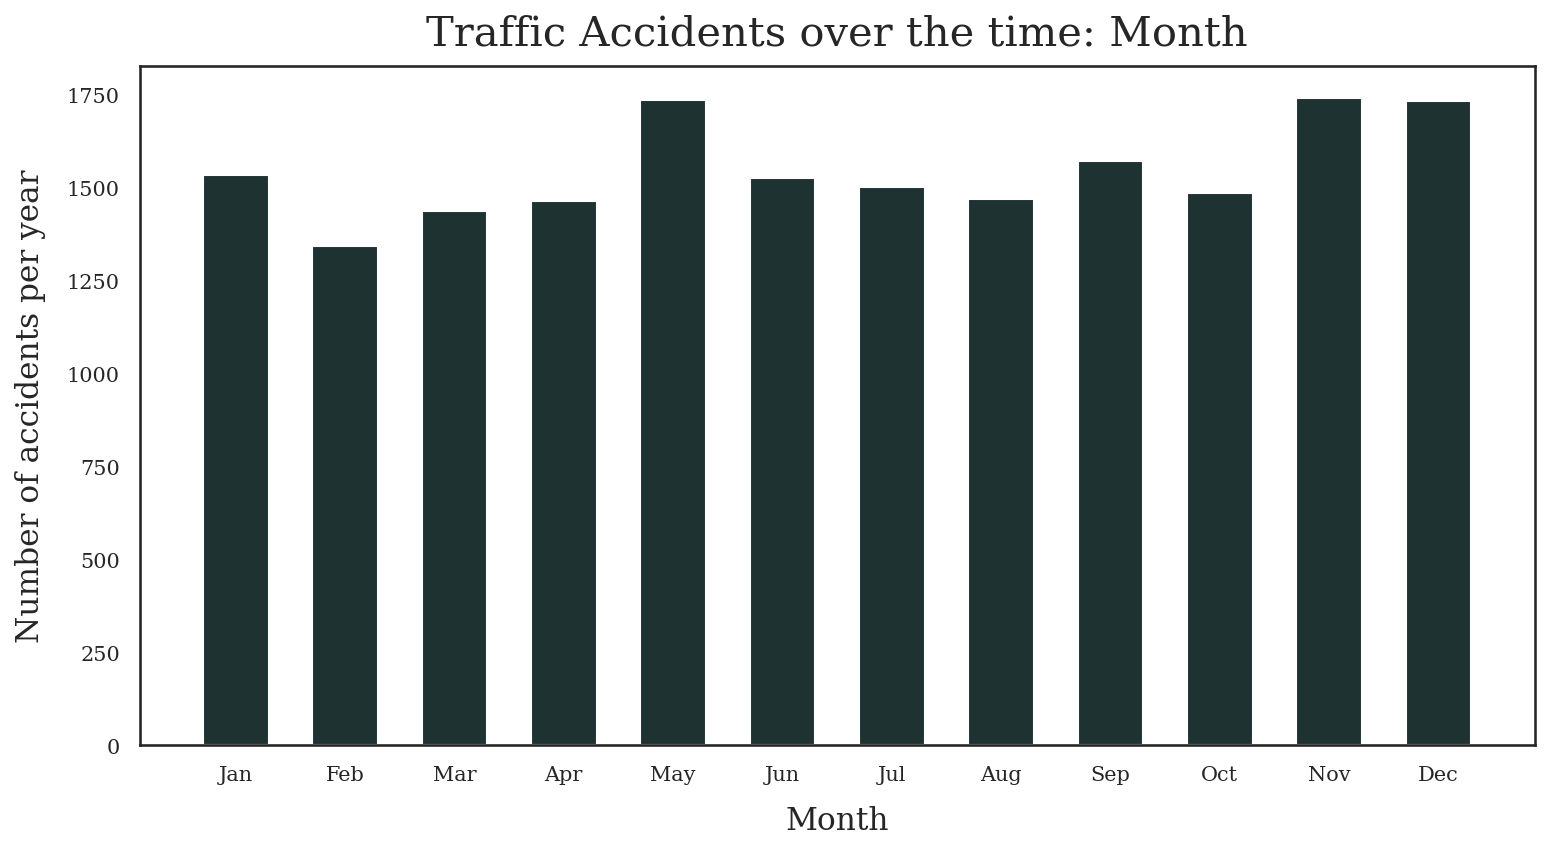

In [66]:
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May',
         'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
         'Nov', 'Dec']
accidents_per_year = []

#graficaremos un promedio de accidentes por año en los debidos meses para tener un punto de comparación
for i in range(12):
    if i >= 10:
        #no contamos con los datos de los meses de octubre, noviembre y diciembre para el año 2019
        accidents_per_year.append(data.groupby(by='Month').count().Latitude.values[i]/4)
    else:
        accidents_per_year.append(data.groupby(by='Month').count().Latitude.values[i]/5)

sns.set(style = 'white',
        #font_scale= 1.5
        )
plt.rc('font', family='serif')

plt.figure(figsize=(12,6),
           dpi = 150
           )

plt.bar( x = np.arange(12),
        height = accidents_per_year,
        width = 0.6,
        color = colours[4],
        )

#pimp my barchart

plt.title('Traffic Accidents over the time: Month', size = 20, pad = 10)
plt.xlabel('Month', labelpad = 10, size = 15)
plt.ylabel( 'Number of accidents per year', labelpad = 10, size = 15 )
plt.tick_params(labelsize = 10)
plt.xticks(range(len(meses)), meses)
#plt.ylim(0, 6500)



plt.show()

Podemos ver con claridad que hay un alto número de accidentes en los meses de las celebraciones navideñas y de año nuevo. El periodo del mes de Mayo es interesante, no sabemos que fecha o evento surge en esos tiempos.

#### Hora más problemática

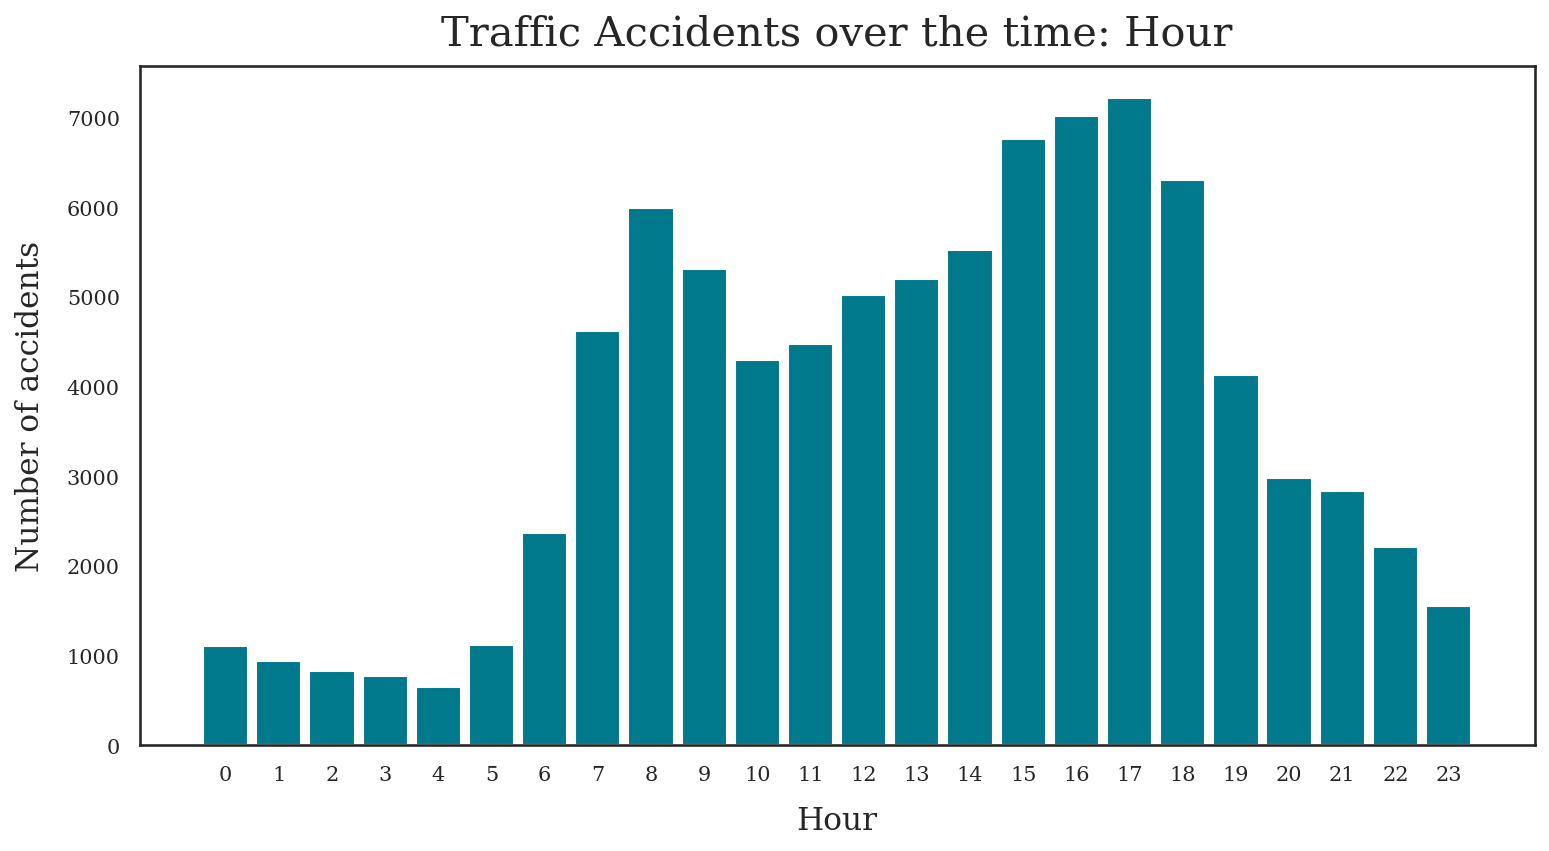

In [67]:
sns.set(style = 'white',
        #font_scale= 1.5
        )
plt.rc('font', family='serif')

plt.figure(figsize=(12,6),
           dpi = 150
           )

plt.bar( x = data.groupby(by='Hour').count().index.values,
        height = data.groupby(by='Hour').count().Latitude.values,
        width = 0.85,
        color = colours[5],
        )

#pimp my barchart

plt.title('Traffic Accidents over the time: Hour', size = 20, pad = 10)
plt.xlabel('Hour', labelpad = 10, size = 15)
plt.ylabel( 'Number of accidents', labelpad = 10, size = 15 )
plt.tick_params(labelsize = 10)
plt.xticks(range(24), np.arange(24))



plt.show()

De acuerdo con la gráfica son en la tarde, alrededor de las 17:00 h y en la mañana a las 8:00 h, podemos pensar en la hora de salida y entrada al trabajo/escuela, respectivamente

## Exploración de variables categóricas

In [68]:
for i in data[categorical_variables].columns.values:
    print(i)
    print(data[i].value_counts())
    print('\n\n')

ACRS Report Type
Property Damage Crash    54872
Injury Crash             34191
Fatal Crash                177
Name: ACRS Report Type, dtype: int64



Collision Type
SAME DIR REAR END               31435
STRAIGHT MOVEMENT ANGLE         15013
OTHER                            9212
SINGLE VEHICLE                   7916
SAME DIRECTION SIDESWIPE         7810
HEAD ON LEFT TURN                6915
SAME DIRECTION RIGHT TURN        1940
SAME DIRECTION LEFT TURN         1920
HEAD ON                          1892
OPPOSITE DIRECTION SIDESWIPE     1442
ANGLE MEETS LEFT TURN            1069
ANGLE MEETS RIGHT TURN            634
SAME DIR REND LEFT TURN           448
SAME DIR REND RIGHT TURN          429
ANGLE MEETS LEFT HEAD ON          368
SAME DIR BOTH LEFT TURN           357
UNKNOWN                           274
OPPOSITE DIR BOTH LEFT TURN       166
Name: Collision Type, dtype: int64



Driver Distracted By
NOT DISTRACTED                                       58340
UNKNOWN                          

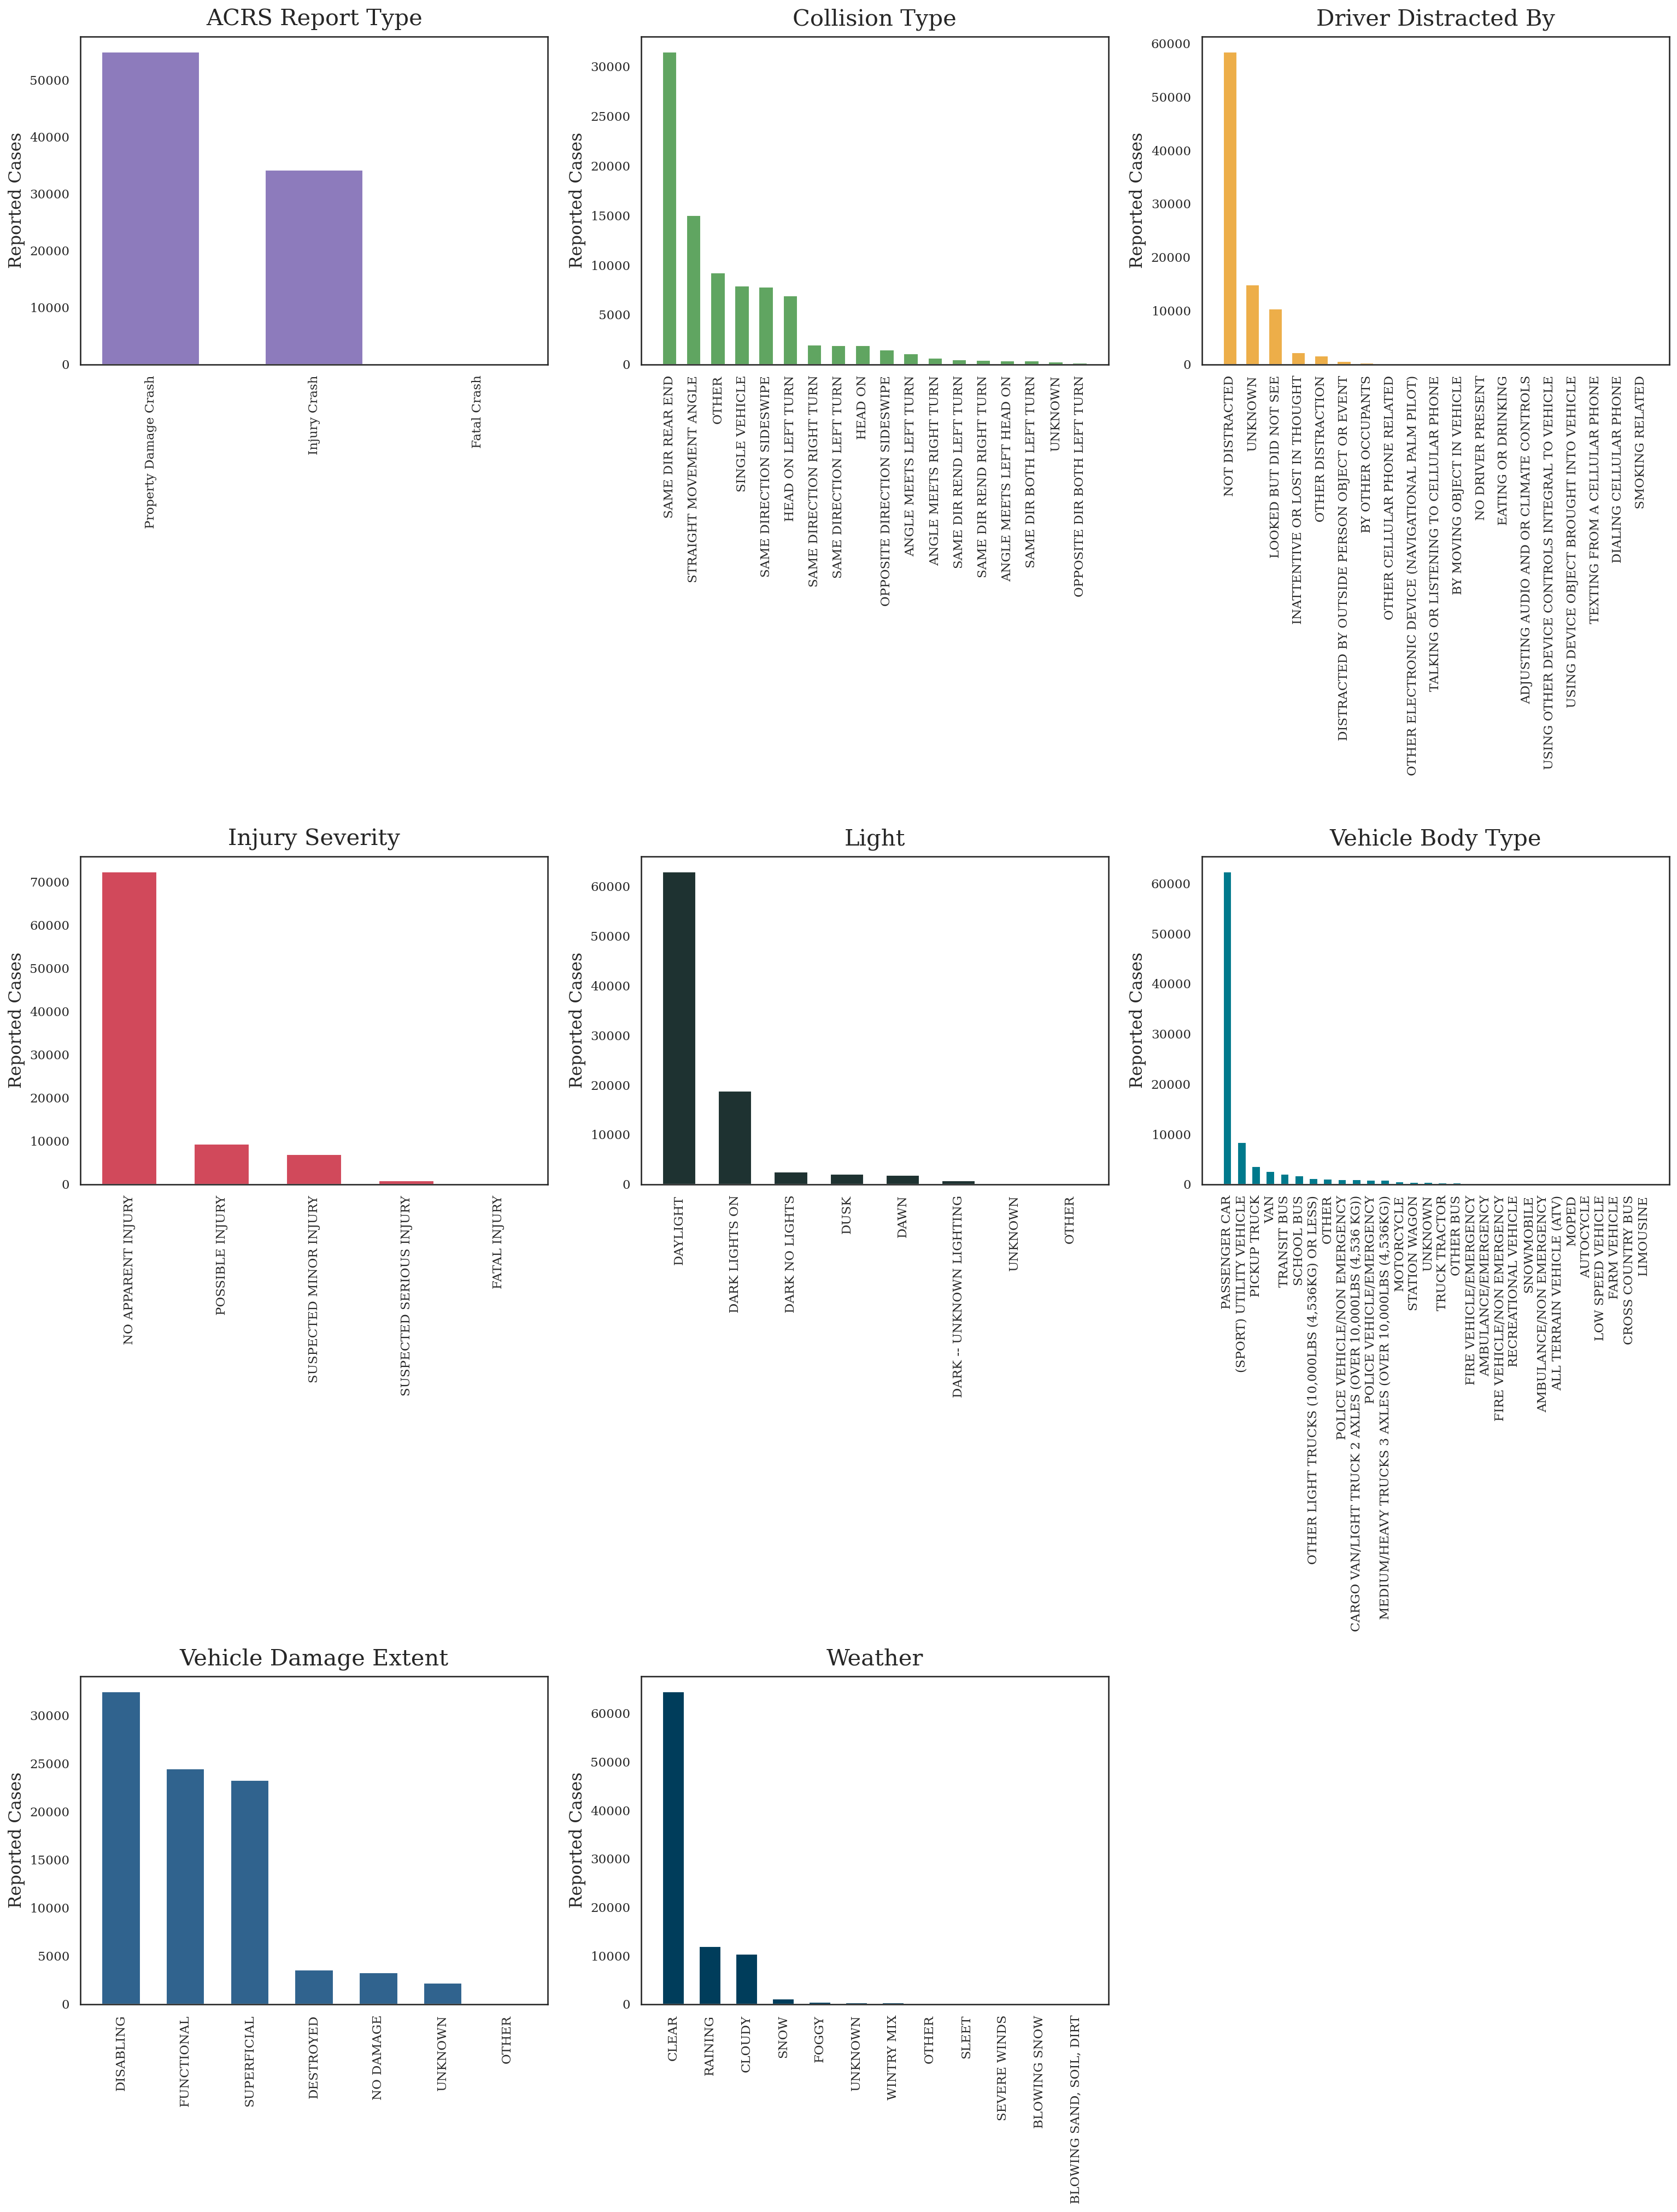

In [69]:
plt.figure(figsize=(25,20), facecolor='white', dpi=150)
plt.axes().set_facecolor('white')

names_var = ['ACRS Report Type', 'Collision Type', 'Driver Distracted By',
             'Injury Severity', 'Light', 'Vehicle Body Type', 
             'Vehicle Damage Extent','Weather']
for i in range(len(names_var)):

    plt.subplot(3,3,i+1)

    plt.bar( x= data[names_var[i]].value_counts().index, 
             height= data[names_var[i]].value_counts().values, 
             width=0.6, 
             color = colours[i], 
             )
    plt.title(names_var[i], size =20, pad = 10)
    plt.xticks(rotation=90)
    plt.ylabel('Reported Cases', size = 15)
    
#ajustamos subplots
plt.subplots_adjust( top = 1.3, bottom= 0.1, 
                    hspace=1.5, wspace = 0.2 #espacio entre subplots 
               )
plt.show()

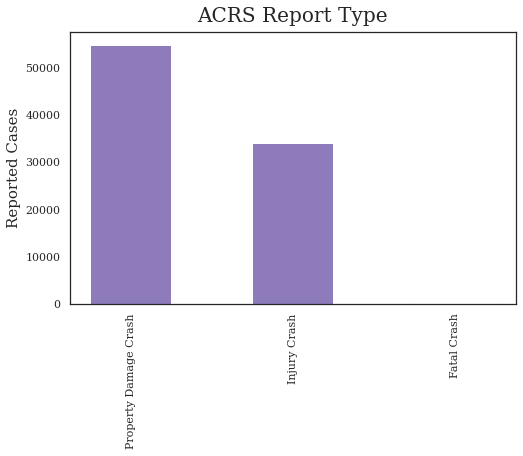

In [70]:
i=0

plt.figure(figsize=(8,5), facecolor='white')
plt.axes().set_facecolor('white')


plt.bar( x= data[categorical_variables[i]].value_counts().index, 
            height= data[categorical_variables[i]].value_counts().values, 
            width=0.5, 
            color = colours[i], 
            )

plt.title(categorical_variables[i], size =20, pad = 10)
plt.xticks(rotation=90)
plt.ylabel('Reported Cases', size = 15)
plt.show()

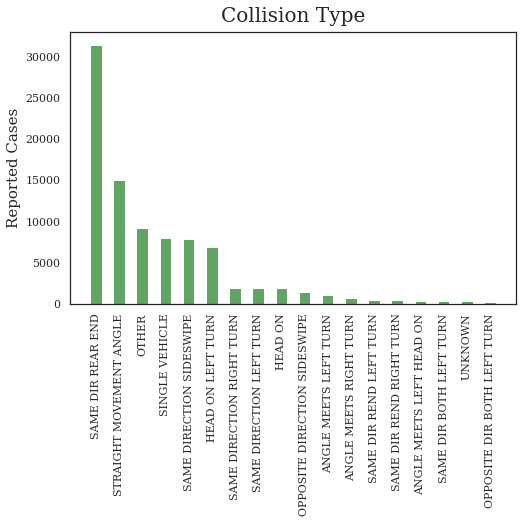

In [71]:
i=1

plt.figure(figsize=(8,5), facecolor='white')
plt.axes().set_facecolor('white')


plt.bar( x= data[categorical_variables[i]].value_counts().index, 
            height= data[categorical_variables[i]].value_counts().values, 
            width=0.5, 
            color = colours[i], 
            )

plt.title(categorical_variables[i], size =20, pad = 10)
plt.xticks(rotation=90)
plt.ylabel('Reported Cases', size = 15)
plt.show()

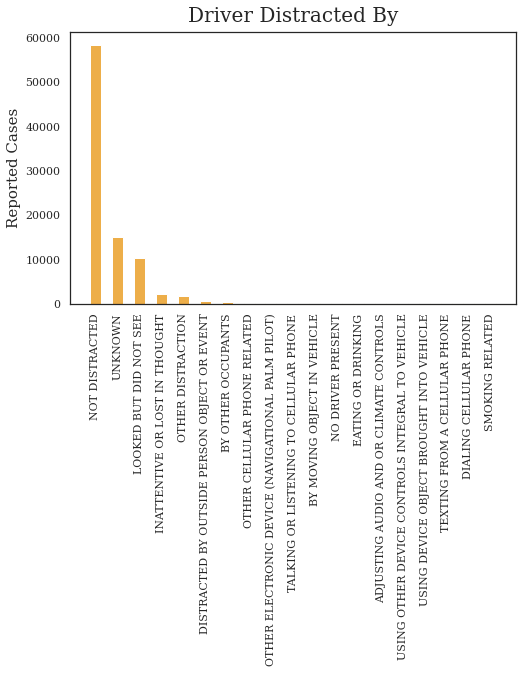

In [72]:
i=2

plt.figure(figsize=(8,5), facecolor='white')
plt.axes().set_facecolor('white')


plt.bar( x= data[categorical_variables[i]].value_counts().index, 
            height= data[categorical_variables[i]].value_counts().values, 
            width=0.5, 
            color = colours[i], 
            )

plt.title(categorical_variables[i], size =20, pad = 10)
plt.xticks(rotation=90)
plt.ylabel('Reported Cases', size = 15)
plt.show()

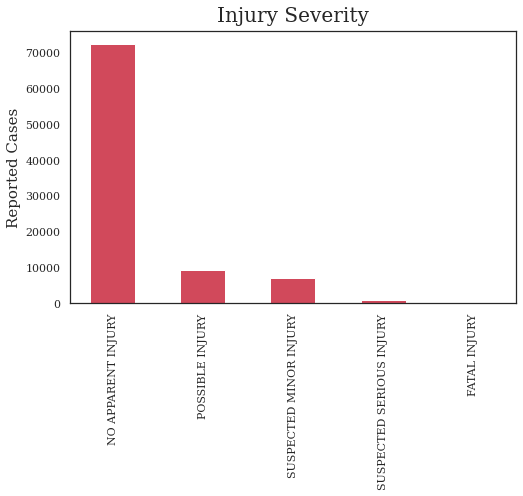

In [73]:
i=3

plt.figure(figsize=(8,5), facecolor='white')
plt.axes().set_facecolor('white')


plt.bar( x= data[categorical_variables[i]].value_counts().index, 
            height= data[categorical_variables[i]].value_counts().values, 
            width=0.5, 
            color = colours[i], 
            )

plt.title(categorical_variables[i], size =20, pad = 10)
plt.xticks(rotation=90)
plt.ylabel('Reported Cases', size = 15)
plt.show()

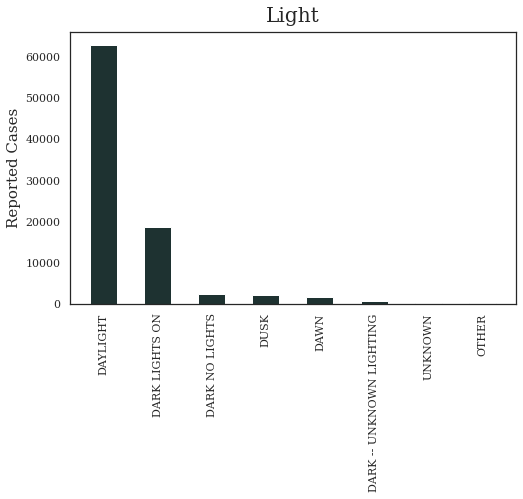

In [74]:
i=4

plt.figure(figsize=(8,5), facecolor='white')
plt.axes().set_facecolor('white')


plt.bar( x= data[categorical_variables[i]].value_counts().index, 
            height= data[categorical_variables[i]].value_counts().values, 
            width=0.5, 
            color = colours[i], 
            )

plt.title(categorical_variables[i], size =20, pad = 10)
plt.xticks(rotation=90)
plt.ylabel('Reported Cases', size = 15)
plt.show()

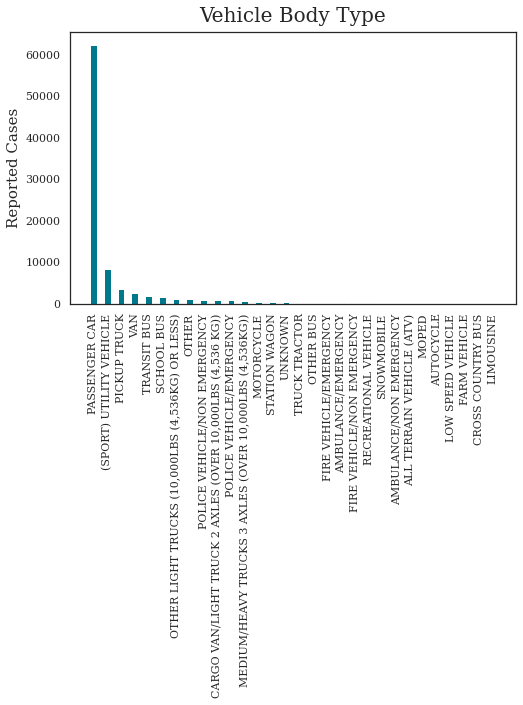

In [75]:
i=5

plt.figure(figsize=(8,5), facecolor='white')
plt.axes().set_facecolor('white')


plt.bar( x= data[categorical_variables[i]].value_counts().index, 
            height= data[categorical_variables[i]].value_counts().values, 
            width=0.5, 
            color = (colours*2)[i], 
            )

plt.title(categorical_variables[i], size =20, pad = 10)
plt.xticks(rotation=90)
plt.ylabel('Reported Cases', size = 15)
plt.show()

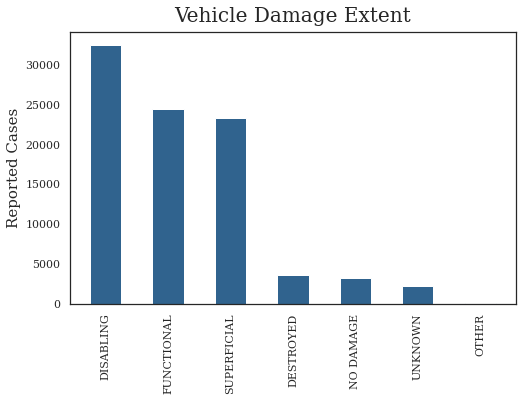

In [76]:
i=6

plt.figure(figsize=(8,5), facecolor='white')
plt.axes().set_facecolor('white')


plt.bar( x= data[categorical_variables[i]].value_counts().index, 
            height= data[categorical_variables[i]].value_counts().values, 
            width=0.5, 
            color = (colours*2)[i], 
            )

plt.title(categorical_variables[i], size =20, pad = 10)
plt.xticks(rotation=90)
plt.ylabel('Reported Cases', size = 15)
plt.show()

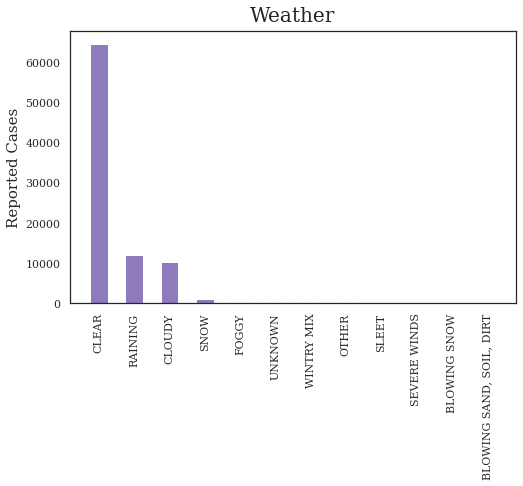

In [77]:
i=9

plt.figure(figsize=(8,5), facecolor='white')
plt.axes().set_facecolor('white')


plt.bar( x= data[categorical_variables[i]].value_counts().index, 
            height= data[categorical_variables[i]].value_counts().values, 
            width=0.5, 
            color = colours[0], 
            )

plt.title(categorical_variables[i], size =20, pad = 10)
plt.xticks(rotation=90)
plt.ylabel('Reported Cases', size = 15)
plt.show()

# Relación entre variables

## Hora y reporte del accidente

La variable **ACRS Report Type** no da de salida tres tipos de reporte:
* Property Damage Crash
* Injury Crash
* Fatal Crash

¿como está la distribución de estos reportes a través del las horas del día?

In [78]:
data1 = data.copy()

In [79]:
#data frame con solamente los datos de la hora
data1_times = data1.iloc[:,16:]

#data frame con los tipos de reportes
data1_report_dummies = pd.get_dummies(data1['ACRS Report Type'], prefix = 'Report_Type' )

#concatenar esos dos data frames y agrupar por la hora
data1_w = pd.concat( [data1_times, data1_report_dummies], axis=1 ).groupby('Hour').sum()

In [80]:
data1_w

Report_Type_Fatal Crash  Report_Type_Injury Crash  \
Hour                                                      
0.0                       3.0                     326.0   
1.0                       4.0                     287.0   
2.0                       5.0                     246.0   
3.0                       4.0                     212.0   
4.0                       1.0                     213.0   
5.0                       4.0                     458.0   
6.0                       6.0                     976.0   
7.0                       8.0                    1863.0   
8.0                       4.0                    2326.0   
9.0                       5.0                    2143.0   
10.0                      9.0                    1628.0   
11.0                     12.0                    1754.0   
12.0                      3.0                    1931.0   
13.0                      8.0                    2021.0   
14.0                      4.0                    2138.0   
15.0                     12.0                    2554.0   
16.0                      7.0                    2631.0   
17.0                      7.0                    2810.0   
18.0                     16.0                    2521.0   
19.0                     16.0                    1587.0   
20.0                     13.0                    1154.0   
21.0                      8.0                    1111.0   
22.0                      5.0                     788.0   
23.0                     13.0                     513.0   

      Report_Type_Property Damage Crash  
Hour                                     
0.0                               781.0  
1.0                               649.0  
2.0                               573.0  
3.0                               552.0  
4.0                               432.0  
5.0                               658.0  
6.0                              1385.0  
7.0                              2748.0  
8.0                              3666.0  
9.0                              3164.0  
10.0                             2664.0  
11.0                             2704.0  
12.0                             3093.0  
13.0                             3168.0  
14.0                             3383.0  
15.0                             4190.0  
16.0                             4382.0  
17.0                             4399.0  
18.0                             3763.0  
19.0                             2532.0  
20.0                             1819.0  
21.0                             1716.0  
22.0                             1422.0  
23.0                             1029.0

In [81]:
#creamos una columna de la suma de los accidentes
data1_w['total accidents'] = data1_w.sum(axis = 1)

#ordenamos de mayor a menor de todos los accidentes
data1_w.sort_values(by = 'total accidents', ascending= False)

Report_Type_Fatal Crash  Report_Type_Injury Crash  \
Hour                                                      
17.0                      7.0                    2810.0   
16.0                      7.0                    2631.0   
15.0                     12.0                    2554.0   
18.0                     16.0                    2521.0   
8.0                       4.0                    2326.0   
14.0                      4.0                    2138.0   
9.0                       5.0                    2143.0   
13.0                      8.0                    2021.0   
12.0                      3.0                    1931.0   
7.0                       8.0                    1863.0   
11.0                     12.0                    1754.0   
10.0                      9.0                    1628.0   
19.0                     16.0                    1587.0   
20.0                     13.0                    1154.0   
21.0                      8.0                    1111.0   
6.0                       6.0                     976.0   
22.0                      5.0                     788.0   
23.0                     13.0                     513.0   
5.0                       4.0                     458.0   
0.0                       3.0                     326.0   
1.0                       4.0                     287.0   
2.0                       5.0                     246.0   
3.0                       4.0                     212.0   
4.0                       1.0                     213.0   

      Report_Type_Property Damage Crash  total accidents  
Hour                                                      
17.0                             4399.0           7216.0  
16.0                             4382.0           7020.0  
15.0                             4190.0           6756.0  
18.0                             3763.0           6300.0  
8.0                              3666.0           5996.0  
14.0                             3383.0           5525.0  
9.0                              3164.0           5312.0  
13.0                             3168.0           5197.0  
12.0                             3093.0           5027.0  
7.0                              2748.0           4619.0  
11.0                             2704.0           4470.0  
10.0                             2664.0           4301.0  
19.0                             2532.0           4135.0  
20.0                             1819.0           2986.0  
21.0                             1716.0           2835.0  
6.0                              1385.0           2367.0  
22.0                             1422.0           2215.0  
23.0                             1029.0           1555.0  
5.0                               658.0           1120.0  
0.0                               781.0           1110.0  
1.0                               649.0            940.0  
2.0                               573.0            824.0  
3.0                               552.0            768.0  
4.0                               432.0            646.0

Podemos observar las horas más problemáticas en las primeras filas

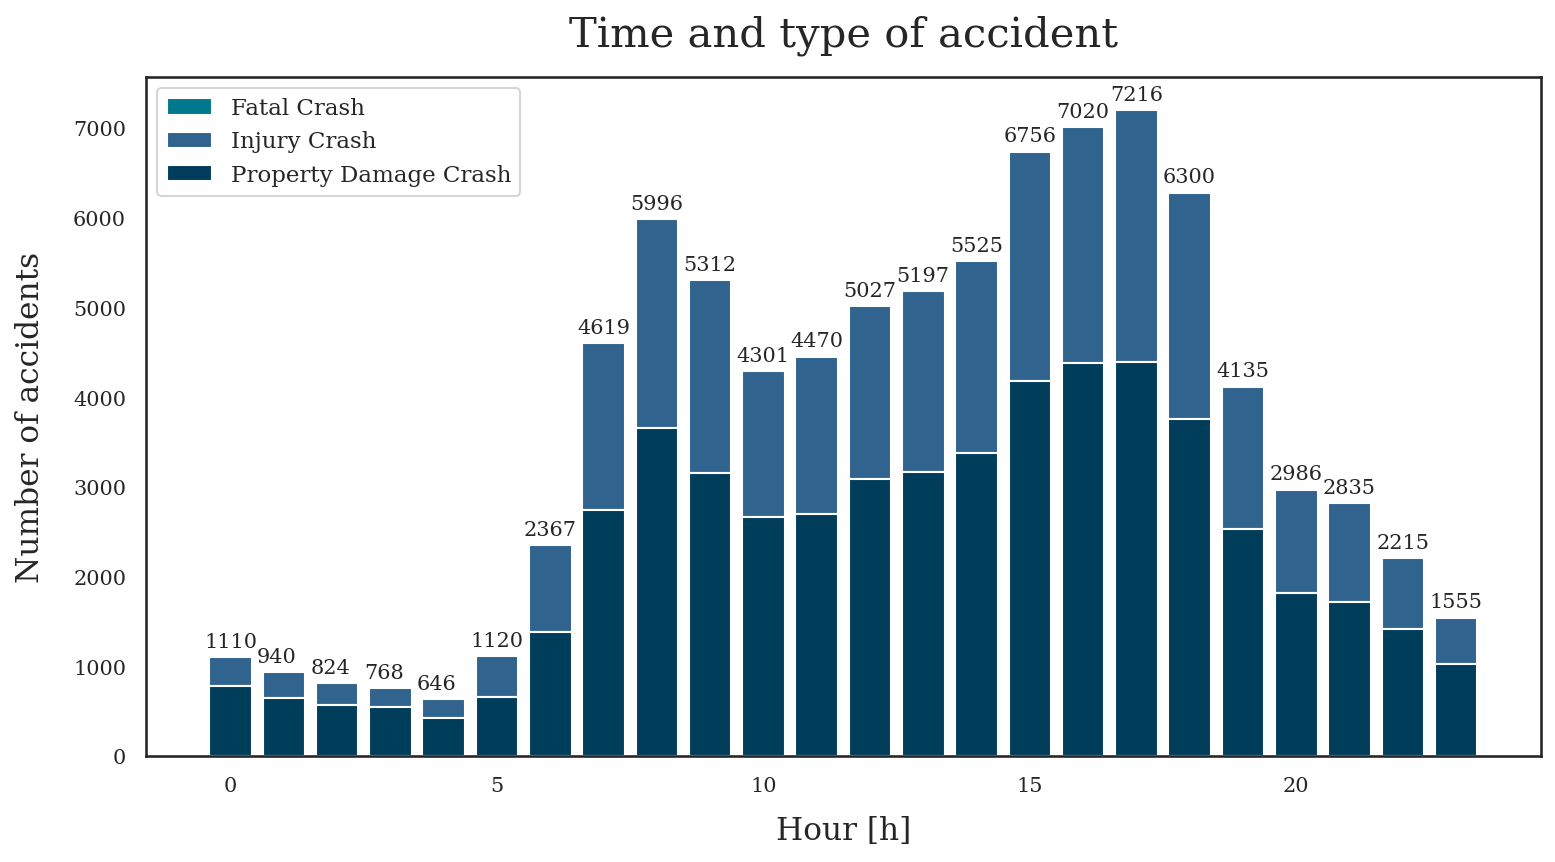

In [82]:
#mejor visualización
plt.figure( 
    figsize = (12,6),
    dpi = 150
 )

plt.bar( x= data1_w.index, height= data1_w['Report_Type_Fatal Crash'],
        color = colours[5],
        bottom = data1_w['Report_Type_Injury Crash'].values + data1_w['Report_Type_Property Damage Crash'].values,
        label = 'Fatal Crash'
        )
plt.bar( x= data1_w.index, height= data1_w['Report_Type_Injury Crash'],
        color = colours[6],
        bottom = data1_w['Report_Type_Property Damage Crash'].values,
        label = 'Injury Crash'
        )
plt.bar( x= data1_w.index, height= data1_w['Report_Type_Property Damage Crash'],
        color = colours[7],
        label = 'Property Damage Crash'
        )

pos = list(zip(data1_w.index.values , data1_w['total accidents'].values))
for i,j in pos:
    plt.text(x= i - 0.5, y = j + 100, s = int(j), fontdict = {'size':10})

plt.title( 'Time and type of accident', size = 20, pad = 15 )
plt.xlabel( 'Hour [h]', size = 15, labelpad = 10 )
plt.ylabel( 'Number of accidents', size = 15, labelpad= 13 )
plt.tick_params( labelsize = 10 )

plt.legend(loc = 0)
plt.show()

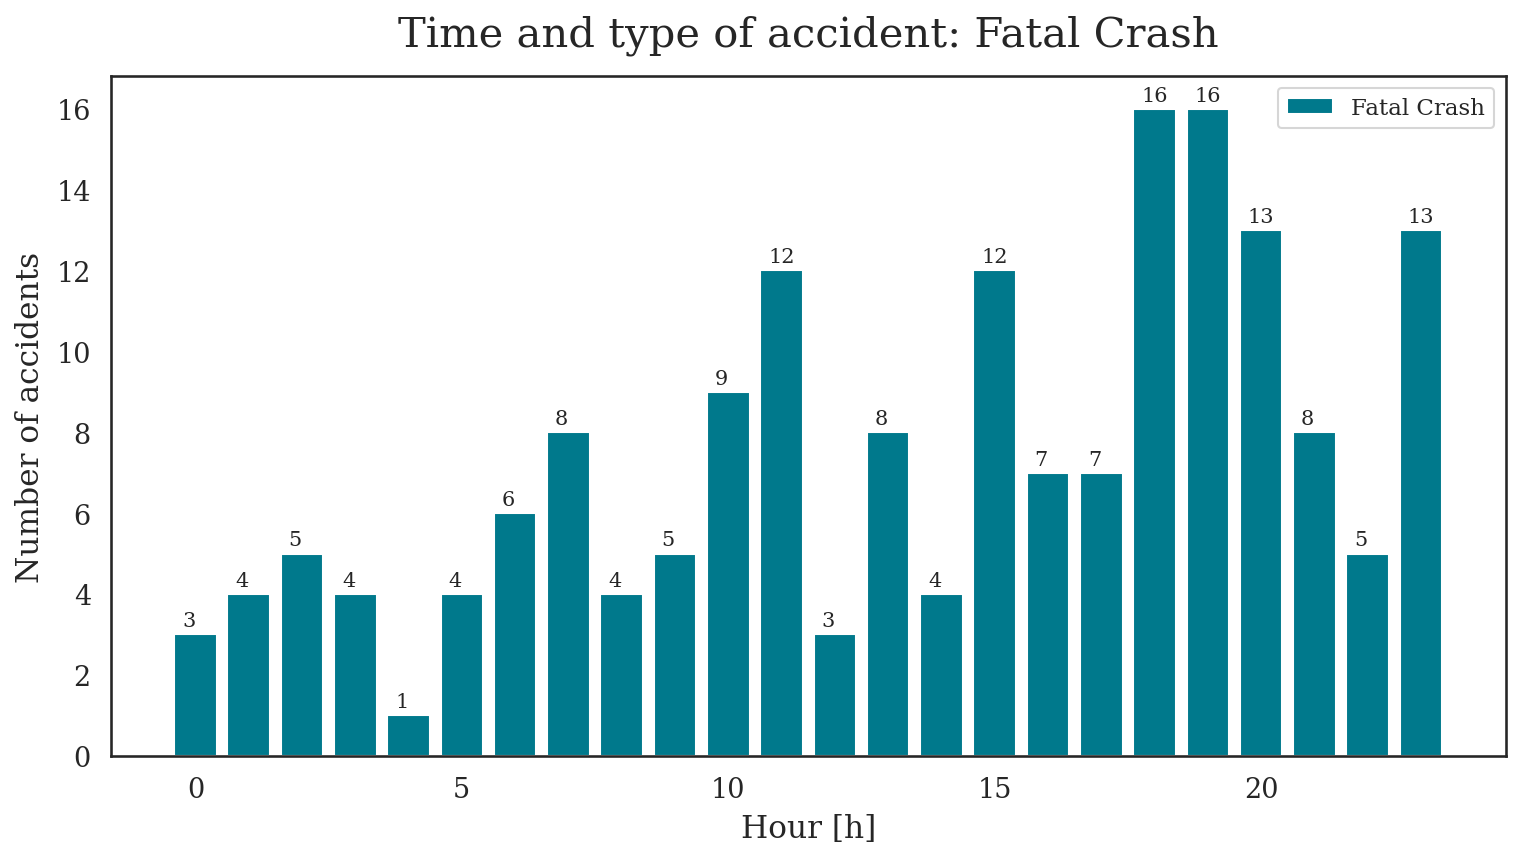

In [83]:
#mejor visualización
plt.figure( 
    figsize = (12,6),
    dpi = 150
 )

plt.bar( x= data1_w.index, height= data1_w['Report_Type_Fatal Crash'],
        color = colours[5],
        label = 'Fatal Crash'
        )

plt.title( 'Time and type of accident: Fatal Crash', size = 20, pad = 15 )
plt.xlabel( 'Hour [h]', size = 15, labelpad = 5 )
plt.ylabel( 'Number of accidents', size = 15, labelpad= 5 )
plt.tick_params( labelsize = 13 )

pos = list(zip(data1_w.index.values , data1_w['Report_Type_Fatal Crash'].values))
for i,j in pos:
    plt.text(x= i - 0.25, y = j + 0.2, s = int(j), fontdict = {'size':10})

plt.legend(loc = 0)
plt.show()

## Periodicidad de la severidad de los accidentes.

Quizás puede haber cambios a través del tiempo, especialmente a través de los años, sobre la cantidad de accidentes registrados. Vamos comparar el número de accidentes en el mes a través de los años.

In [84]:
data2 = data.copy()

In [85]:
#data frame con solamente los datos de la hora
data2_times = data2.iloc[:,13:]

#data frame con los tipos de reportes
data2_report_dummies = pd.get_dummies(data2['ACRS Report Type'], prefix = 'Report_Type' )

#concatenar esos dos data frames y agrupar por la hora
data2_w = pd.concat( [data2_times, data2_report_dummies], axis=1 ).drop(columns=['Day', 'Hour']).groupby(['Year','Month']).sum()




In [86]:
# crear dataframes por cada año
data2_15 = data2_w.T[2015].T
data2_16 = data2_w.T[2016].T
data2_17 = data2_w.T[2017].T
data2_18 = data2_w.T[2018].T

#caso especial
data2_19 = data2_w.T[2019]
data2_19['10.0'] = np.zeros(3)
data2_19['11.0'] = np.zeros(3)
data2_19['12.0'] = np.zeros(3)
data2_19 = data2_19.T

#total de accidentes
data2_15['total accidents'] = data2_15.sum(axis = 1)
data2_16['total accidents'] = data2_16.sum(axis = 1)
data2_17['total accidents'] = data2_17.sum(axis = 1)
data2_18['total accidents'] = data2_18.sum(axis = 1)
data2_19['total accidents'] = data2_19.sum(axis = 1)

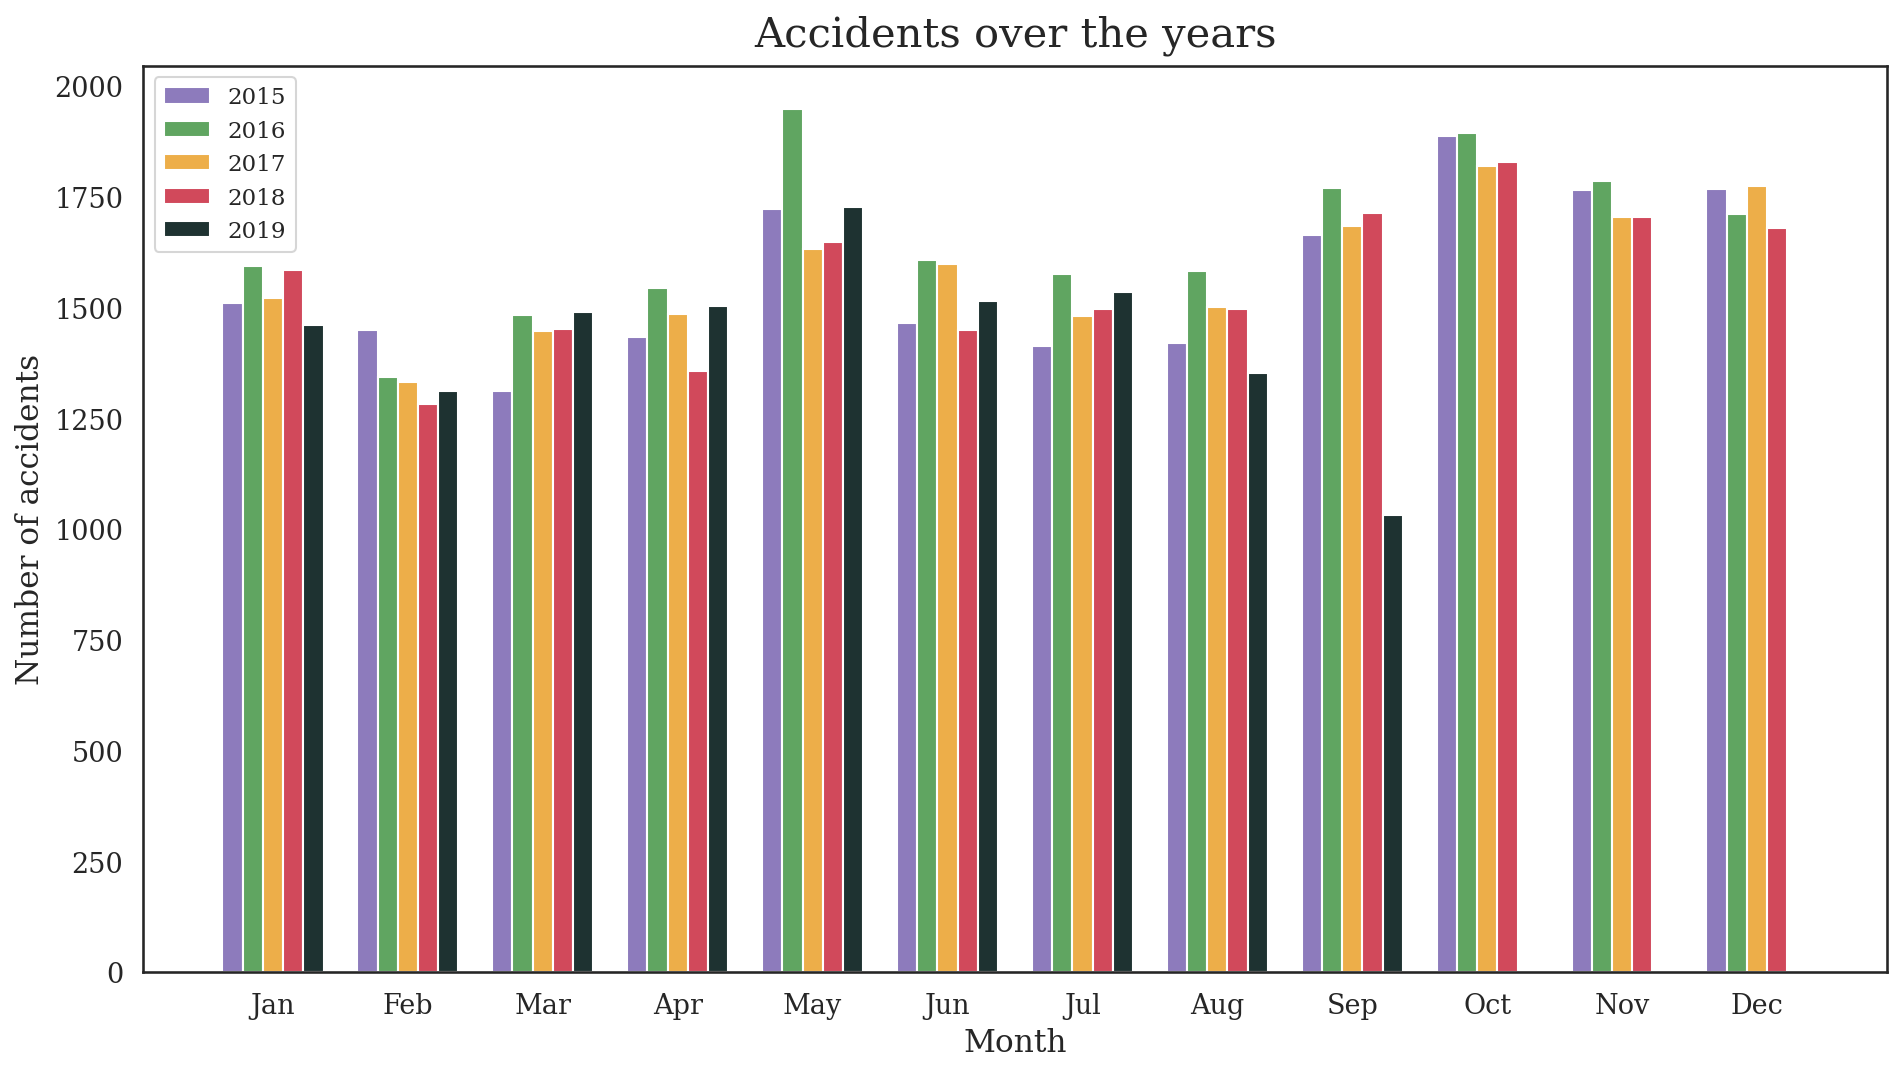

In [87]:
#graficar el total de accidentes de los meses de diferentes años
plt.figure( figsize=(15,8),
           dpi = 150
           )


w = 0.15
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May',
         'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
         'Nov', 'Dec']
plt.bar(x= np.arange(12) - w*2,
        height = data2_15['total accidents'],
        color = colours[0],
        width = w,
        label = '2015'
        )

plt.bar(x= np.arange(12) - w,
        height = data2_16['total accidents'],
        color = colours[1],
        width = w,
        label = '2016'
        )
plt.bar(x= np.arange(12) ,
        height = data2_17['total accidents'],
        color = colours[2],
        width = w,
        label = '2017'
        )

plt.bar(x= np.arange(12) + w,
        height = data2_18['total accidents'],
        color = colours[3],
        width = w,
        label = '2018'
        )
plt.bar(x= np.arange(12) + w*2,
        height = data2_19['total accidents'],
        color = colours[4],
        width = w,
        label = '2019'
        )
plt.title('Accidents over the years', size = 20, pad = 10)
plt.xlabel('Month', size = 15)
plt.ylabel('Number of accidents', size = 15)
plt.tick_params(labelsize = 13)
plt.xticks(range(len(meses)), meses)

plt.legend(loc=0)

# Reducción de categorías, variables y modificación a la variable de salida

## Variables irrelevantes para el modelo

No todas las variables que hemos revisado serán las que se usen en el modelo ya que algunas aún no podemos obtener a través de una aplicación móvil. Se eleminarán las siguientes:
* ACRS Report Type
* Collision Type
* Driver Distracted By
* Light
* Vehicle Damage Extent

In [88]:
data.drop(columns=['ACRS Report Type', 'Collision Type', 'Driver Distracted By', 'Light', 'Vehicle Damage Extent'], inplace=True)

In [89]:
data.head(5)

Latitude  Longitude  Vehicle Year     Injury Severity Weather  \
0  39.044760 -77.052257          2019  NO APPARENT INJURY   CLEAR   
1  39.044760 -77.052257          2009  NO APPARENT INJURY   CLEAR   
2  39.090453 -77.050633          2018     POSSIBLE INJURY   CLEAR   
3  39.090453 -77.050633          2015  NO APPARENT INJURY   CLEAR   
4  39.073533 -77.111992          2016  NO APPARENT INJURY   CLEAR   

  Vehicle Make        Vehicle Body Type Vehicle Model  Month   Day    Year  \
0        BUICK  (SPORT) UTILITY VEHICLE       ENCLAVE    9.0  25.0  2019.0   
1         ACUR            PASSENGER CAR            4S    9.0  25.0  2019.0   
2       TOYOTA            PASSENGER CAR         CAMRY    9.0  25.0  2019.0   
3        HONDA  (SPORT) UTILITY VEHICLE           CRV    9.0  25.0  2019.0   
4         HOND  (SPORT) UTILITY VEHICLE            TK    9.0  25.0  2019.0   

   Hour  
0  11.0  
1  11.0  
2   9.0  
3   9.0  
4   9.0

## Reducción de categorías

Para un mejor preprocesamiento de las variables categóricas vamos a reducir las categorías "eliminando" o mejor dicho, almacenando los datos que tienen un menor número de frecuencias en el apartado de `OTHER`

In [90]:
data.columns

Index(['Latitude', 'Longitude', 'Vehicle Year', 'Injury Severity', 'Weather',
       'Vehicle Make', 'Vehicle Body Type', 'Vehicle Model', 'Month', 'Day',
       'Year', 'Hour'],
      dtype='object')

### `Weather`


In [91]:
data.Weather.value_counts()

CLEAR                       64442
RAINING                     11944
CLOUDY                      10298
SNOW                         1082
FOGGY                         349
UNKNOWN                       305
WINTRY MIX                    260
OTHER                         225
SLEET                         129
SEVERE WINDS                  100
BLOWING SNOW                   91
BLOWING SAND, SOIL, DIRT       15
Name: Weather, dtype: int64

In [92]:
#dejaremos las básicas: CLEAR, RAINING, CLOUDY, SNOW
def red_Weather(string):
    if (string=='CLEAR') or (string=='RAINING') or (string=='CLOUDY') or (string=='SNOW'):
        return string
    else:
        return 'OTHER'

In [93]:
data.Weather = df.Weather.apply(red_Weather)

data.Weather.value_counts()

CLEAR      64442
RAINING    11944
CLOUDY     10298
OTHER       1474
SNOW        1082
Name: Weather, dtype: int64

### `Vehicle Make`

In [94]:
data['Vehicle Make'].value_counts().head(30)

TOYOTA       11832
HONDA         9595
FORD          9189
TOYT          4877
NISSAN        4516
HOND          3132
DODGE         2353
CHEV          2078
CHEVROLET     2012
HYUNDAI       1929
JEEP          1881
BMW           1691
CHEVY         1688
ACURA         1511
LEXUS         1506
NISS          1500
KIA           1193
HYUN          1111
MAZDA         1098
GMC           1038
SUBARU        1029
THOMAS         925
MERZ           907
MERCEDES       705
AUDI           655
GILL           628
CHRYSLER       584
VOLK           543
ACUR           542
VOLVO          535
Name: Vehicle Make, dtype: int64

In [95]:
def red_VehMake(string):
    if (string == 'HONDA') or (string=='HOND'):
        return 'HONDA'
    elif (string=='TOYOTA') or (string=='TOYT'):
        return 'TOYOTA'
    elif (string=='NISSAN') or (string=='NISS'):
        return 'NISSAN'
    elif (string=='DODGE'):
        return 'DODGE'
    elif (string=='CHEVROLET') or (string=='CHEVY') or (string=='CHEV'):
        return 'CHEVROLET'
    elif (string=='HYUNDAI') or (string=='HYUN'):
        return 'HYUNDAI'
    elif (string=='JEEP'):
        return string
    elif (string=='BMW'):
        return string
    elif string=='KIA':
        return string
    elif string=='MAZDA':
        return string
    elif (string=='SUBARU'):
        return string
    elif (string=='AUDI') or (string=='AUD') or (string=='UDI'):
        return 'AUDI'
    elif (string=='VOLVO') or (string=='VOLK'):
        return 'VOLVO'
    elif string=='CHRYSLER':
        return string
    elif (string=='ACURA') or (string=='ACUR'):
        return 'ACURA'
    elif (string=='MERCEDES') or (string=='MERCEDES-BENZ') or (string=='MERZ'):
        return 'MERCEDES-BENZ'
    else: 
        return 'OTHER'

In [96]:
data['Vehicle Make'] = df['Vehicle Make'].apply(red_VehMake)

data['Vehicle Make'].value_counts()

OTHER            29720
TOYOTA           16709
HONDA            12727
NISSAN            6016
CHEVROLET         5778
HYUNDAI           3040
DODGE             2353
ACURA             2053
JEEP              1881
BMW               1691
MERCEDES-BENZ     1635
KIA               1193
MAZDA             1098
VOLVO             1078
SUBARU            1029
AUDI               655
CHRYSLER           584
Name: Vehicle Make, dtype: int64

### `Vehicle Model`

In [97]:
data['Vehicle Model'].value_counts().head(20)

4S            8431
TK            6152
CAMRY         3299
ACCORD        3069
COROLLA       2935
CIVIC         2785
BUS           2345
ALTIMA        1429
4D            1333
CRV           1326
RAV4          1090
VAN            997
TRUCK          978
VN             919
SUV            904
PRIUS          860
EXPLORER       771
SIENNA         769
HIGHLANDER     761
SONATA         754
Name: Vehicle Model, dtype: int64

In [98]:
#vamos a usar los primeros 10 lugaremos y los demás de guardan en OTHER
def red_VehMod(string):
    if (string=='4S') or (string=='TK') or (string=='CAMRY') or (string=='ACCORD') or (string=='COROLLA') or (string=='CIVIC') or (string=='BUS') or (string=='ALTIMA') or (string=='4D') or (string=='CRV'):
        return string
    else:
        return 'OTHER'

In [99]:
data['Vehicle Model'] = df['Vehicle Model'].apply(red_VehMod)

data['Vehicle Model'].value_counts()

OTHER      56136
4S          8431
TK          6152
CAMRY       3299
ACCORD      3069
COROLLA     2935
CIVIC       2785
BUS         2345
ALTIMA      1429
4D          1333
CRV         1326
Name: Vehicle Model, dtype: int64

### `Vehicle Body Type`

In [100]:
data['Vehicle Body Type'].value_counts()

PASSENGER CAR                                                62278
(SPORT) UTILITY VEHICLE                                       8351
PICKUP TRUCK                                                  3593
VAN                                                           2594
TRANSIT BUS                                                   1978
SCHOOL BUS                                                    1672
OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)              1169
OTHER                                                         1093
POLICE VEHICLE/NON EMERGENCY                                   958
CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))      947
POLICE VEHICLE/EMERGENCY                                       837
MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))         801
MOTORCYCLE                                                     457
STATION WAGON                                                  444
UNKNOWN                                                       

In [101]:
def red_VehBodyType(string):
    if (string == 'PASSENGER CAR' ) or (string=='(SPORT) UTILITY VEHICLE') or (string=='PICKUP TRUCK') or (string=='VAN') or (string=='TRANSIT BUS') or (string=='SCHOOL BUS') or (string=='MOTORCYCLE'):
        return string
    else: 
        return 'OTHER'

In [102]:
data['Vehicle Body Type'] = df['Vehicle Body Type'].apply(red_VehBodyType)

data['Vehicle Body Type'].value_counts()

PASSENGER CAR              62278
(SPORT) UTILITY VEHICLE     8351
OTHER                       8317
PICKUP TRUCK                3593
VAN                         2594
TRANSIT BUS                 1978
SCHOOL BUS                  1672
MOTORCYCLE                   457
Name: Vehicle Body Type, dtype: int64

## Modificación de la variable de salida

In [103]:
data['Injury Severity'].value_counts()

NO APPARENT INJURY          72227
POSSIBLE INJURY              9264
SUSPECTED MINOR INJURY       6897
SUSPECTED SERIOUS INJURY      791
FATAL INJURY                   61
Name: Injury Severity, dtype: int64

In [104]:
#crear una función para luego usar en apply()
def cambio_InjSev(injury):
    if (injury == 'Zero Prob'):
        return 'Low Probability of Accident'
    else:
        return 'High Probability of Accident'

In [105]:
data['Probability of Accident'] = data['Injury Severity'].apply(cambio_InjSev)

In [106]:
data.drop(columns='Injury Severity', inplace=True)

In [107]:
data.head(5)

Latitude  Longitude  Vehicle Year Weather Vehicle Make  \
0  39.044760 -77.052257          2019   CLEAR        OTHER   
1  39.044760 -77.052257          2009   CLEAR        ACURA   
2  39.090453 -77.050633          2018   CLEAR       TOYOTA   
3  39.090453 -77.050633          2015   CLEAR        HONDA   
4  39.073533 -77.111992          2016   CLEAR        HONDA   

         Vehicle Body Type Vehicle Model  Month   Day    Year  Hour  \
0  (SPORT) UTILITY VEHICLE         OTHER    9.0  25.0  2019.0  11.0   
1            PASSENGER CAR            4S    9.0  25.0  2019.0  11.0   
2            PASSENGER CAR         CAMRY    9.0  25.0  2019.0   9.0   
3  (SPORT) UTILITY VEHICLE           CRV    9.0  25.0  2019.0   9.0   
4  (SPORT) UTILITY VEHICLE            TK    9.0  25.0  2019.0   9.0   

        Probability of Accident  
0  High Probability of Accident  
1  High Probability of Accident  
2  High Probability of Accident  
3  High Probability of Accident  
4  High Probability of Accident

## Cambiar el mes a variable categórica y los años, días y horas a valores enteros

In [108]:
data.head()

Latitude  Longitude  Vehicle Year Weather Vehicle Make  \
0  39.044760 -77.052257          2019   CLEAR        OTHER   
1  39.044760 -77.052257          2009   CLEAR        ACURA   
2  39.090453 -77.050633          2018   CLEAR       TOYOTA   
3  39.090453 -77.050633          2015   CLEAR        HONDA   
4  39.073533 -77.111992          2016   CLEAR        HONDA   

         Vehicle Body Type Vehicle Model  Month   Day    Year  Hour  \
0  (SPORT) UTILITY VEHICLE         OTHER    9.0  25.0  2019.0  11.0   
1            PASSENGER CAR            4S    9.0  25.0  2019.0  11.0   
2            PASSENGER CAR         CAMRY    9.0  25.0  2019.0   9.0   
3  (SPORT) UTILITY VEHICLE           CRV    9.0  25.0  2019.0   9.0   
4  (SPORT) UTILITY VEHICLE            TK    9.0  25.0  2019.0   9.0   

        Probability of Accident  
0  High Probability of Accident  
1  High Probability of Accident  
2  High Probability of Accident  
3  High Probability of Accident  
4  High Probability of Accident

In [109]:
def month_names(number):
    if number == 1:
        return 'January'
    elif number == 2:
        return 'February'
    elif number == 3:
        return 'March'
    elif number == 4: 
        return 'April'
    elif number == 5:
        return 'May'
    elif number == 6:
        return 'June'
    elif number == 7: 
        return 'July'
    elif number == 8:
        return 'August'
    elif number == 9:
        return 'September'
    elif number == 10: 
        return 'Octuber'
    elif number == 11:
        return 'November'
    elif number == 12:
        return 'December'

In [110]:
#cambiamos a meses
data['Month'] = data['Month'].apply(month_names)

#cambiamos a enteros
data['Year'] = data['Year'].apply(int)
data['Day'] = data['Day'].apply(int)
data['Hour'] = data['Hour'].apply(int)

In [111]:
data.head()

Latitude  Longitude  Vehicle Year Weather Vehicle Make  \
0  39.044760 -77.052257          2019   CLEAR        OTHER   
1  39.044760 -77.052257          2009   CLEAR        ACURA   
2  39.090453 -77.050633          2018   CLEAR       TOYOTA   
3  39.090453 -77.050633          2015   CLEAR        HONDA   
4  39.073533 -77.111992          2016   CLEAR        HONDA   

         Vehicle Body Type Vehicle Model      Month  Day  Year  Hour  \
0  (SPORT) UTILITY VEHICLE         OTHER  September   25  2019    11   
1            PASSENGER CAR            4S  September   25  2019    11   
2            PASSENGER CAR         CAMRY  September   25  2019     9   
3  (SPORT) UTILITY VEHICLE           CRV  September   25  2019     9   
4  (SPORT) UTILITY VEHICLE            TK  September   25  2019     9   

        Probability of Accident  
0  High Probability of Accident  
1  High Probability of Accident  
2  High Probability of Accident  
3  High Probability of Accident  
4  High Probability of Accident

# _Data set_ filtrado

Finalmente nos quedamos con las siguientes variables

In [112]:
data

Latitude  Longitude  Vehicle Year Weather Vehicle Make  \
0      39.044760 -77.052257          2019   CLEAR        OTHER   
1      39.044760 -77.052257          2009   CLEAR        ACURA   
2      39.090453 -77.050633          2018   CLEAR       TOYOTA   
3      39.090453 -77.050633          2015   CLEAR        HONDA   
4      39.073533 -77.111992          2016   CLEAR        HONDA   
...          ...        ...           ...     ...          ...   
98748  38.986078 -77.117035          2005   CLEAR        ACURA   
98976  39.068337 -77.061052          2006  CLOUDY        OTHER   
99018  39.085060 -77.078553          2007    SNOW        OTHER   
99242  39.129494 -77.163956          2002   CLEAR        OTHER   
99256  39.033542 -77.147553          2007   CLEAR        OTHER   

             Vehicle Body Type Vehicle Model      Month  Day  Year  Hour  \
0      (SPORT) UTILITY VEHICLE         OTHER  September   25  2019    11   
1                PASSENGER CAR            4S  September   25  2019    11   
2                PASSENGER CAR         CAMRY  September   25  2019     9   
3      (SPORT) UTILITY VEHICLE           CRV  September   25  2019     9   
4      (SPORT) UTILITY VEHICLE            TK  September   25  2019     9   
...                        ...           ...        ...  ...   ...   ...   
98748  (SPORT) UTILITY VEHICLE         OTHER    January   10  2015    15   
98976                    OTHER         OTHER    January    6  2015    12   
99018                    OTHER         OTHER    January    6  2015     8   
99242                    OTHER         OTHER    January    1  2015    16   
99256                    OTHER         OTHER    January    1  2015    10   

            Probability of Accident  
0      High Probability of Accident  
1      High Probability of Accident  
2      High Probability of Accident  
3      High Probability of Accident  
4      High Probability of Accident  
...                             ...  
98748  High Probability of Accident  
98976  High Probability of Accident  
99018  High Probability of Accident  
99242  High Probability of Accident  
99256  High Probability of Accident  

[89240 rows x 12 columns]

# Muestras negativas

In [113]:
muestras = 40000
negativos = { 'Latitude': np.random.uniform( low= data.Latitude.min(), high= data.Latitude.max(), size = muestras ),
             'Longitude': np.random.uniform( low= data.Longitude.min(), high= data.Longitude.max(), size = muestras ),
             'Vehicle Year': np.random.randint( 1995, high= 2022, size = muestras ),
             'Weather': np.random.choice( data['Weather'].values, muestras ),
             'Vehicle Make': np.random.choice( data['Vehicle Make'].values, muestras ),
             'Vehicle Body Type': np.random.choice( data['Vehicle Body Type'].values, muestras ),
             'Vehicle Model': np.random.choice( data['Vehicle Model'].values, muestras ),
             'Month': np.random.choice( data['Month'].values, muestras ),
             'Day': np.random.randint( low= data['Day'].min(), high= data['Day'].max() + 1, size = muestras ) ,
             'Year': np.random.randint( low= data['Year'].min(), high= data['Year'].max() + 1, size = muestras ) ,
             'Hour': np.random.randint( low= data['Hour'].min(), high= data['Hour'].max() + 1, size = muestras ) ,
             'Probability of Accident': np.array(['Low Probability of Accident']*muestras)
             }

datos_negativos = pd.DataFrame(negativos)
datos_negativos

Latitude  Longitude  Vehicle Year  Weather Vehicle Make  \
0      38.809489 -78.145578          1998    CLEAR       TOYOTA   
1      39.035909 -78.200514          2014    CLEAR        OTHER   
2      39.209467 -75.996316          1995  RAINING        OTHER   
3      39.216295 -78.225794          2018    CLEAR        OTHER   
4      39.629630 -77.772837          2012   CLOUDY       TOYOTA   
...          ...        ...           ...      ...          ...   
39995  39.917483 -77.376126          1996    CLEAR       TOYOTA   
39996  39.241855 -77.465440          1996    CLEAR        HONDA   
39997  39.073835 -77.138794          1995    CLEAR        ACURA   
39998  39.950775 -79.285751          2005   CLOUDY       NISSAN   
39999  38.711823 -77.592964          2000    CLEAR       NISSAN   

             Vehicle Body Type Vehicle Model      Month  Day  Year  Hour  \
0                PASSENGER CAR            4S    January   13  2018     5   
1                PASSENGER CAR         OTHER  September   24  2015    10   
2                        OTHER         CIVIC   February   25  2017    22   
3                PASSENGER CAR         OTHER      April   10  2015    16   
4      (SPORT) UTILITY VEHICLE         OTHER       July   20  2019    10   
...                        ...           ...        ...  ...   ...   ...   
39995                    OTHER            4D       July   21  2015     3   
39996            PASSENGER CAR         OTHER      April    3  2015    13   
39997            PASSENGER CAR         CAMRY      March   26  2017    14   
39998            PASSENGER CAR         OTHER   November   17  2018    21   
39999            PASSENGER CAR         OTHER       July   14  2016    22   

           Probability of Accident  
0      Low Probability of Accident  
1      Low Probability of Accident  
2      Low Probability of Accident  
3      Low Probability of Accident  
4      Low Probability of Accident  
...                            ...  
39995  Low Probability of Accident  
39996  Low Probability of Accident  
39997  Low Probability of Accident  
39998  Low Probability of Accident  
39999  Low Probability of Accident  

[40000 rows x 12 columns]

In [114]:
datos_negativos.iloc[:,:-1].merge( data.iloc[:,:-1], how= 'inner' )

Empty DataFrame
Columns: [Latitude, Longitude, Vehicle Year, Weather, Vehicle Make, Vehicle Body Type, Vehicle Model, Month, Day, Year, Hour]
Index: []

# Unión de datos positivos y negativos

In [115]:
data_united = pd.concat( [data, datos_negativos], axis=0 )
data_united = data_united.reset_index().drop(columns='index')
data_united

Latitude  Longitude  Vehicle Year Weather Vehicle Make  \
0       39.044760 -77.052257          2019   CLEAR        OTHER   
1       39.044760 -77.052257          2009   CLEAR        ACURA   
2       39.090453 -77.050633          2018   CLEAR       TOYOTA   
3       39.090453 -77.050633          2015   CLEAR        HONDA   
4       39.073533 -77.111992          2016   CLEAR        HONDA   
...           ...        ...           ...     ...          ...   
129235  39.917483 -77.376126          1996   CLEAR       TOYOTA   
129236  39.241855 -77.465440          1996   CLEAR        HONDA   
129237  39.073835 -77.138794          1995   CLEAR        ACURA   
129238  39.950775 -79.285751          2005  CLOUDY       NISSAN   
129239  38.711823 -77.592964          2000   CLEAR       NISSAN   

              Vehicle Body Type Vehicle Model      Month  Day  Year  Hour  \
0       (SPORT) UTILITY VEHICLE         OTHER  September   25  2019    11   
1                 PASSENGER CAR            4S  September   25  2019    11   
2                 PASSENGER CAR         CAMRY  September   25  2019     9   
3       (SPORT) UTILITY VEHICLE           CRV  September   25  2019     9   
4       (SPORT) UTILITY VEHICLE            TK  September   25  2019     9   
...                         ...           ...        ...  ...   ...   ...   
129235                    OTHER            4D       July   21  2015     3   
129236            PASSENGER CAR         OTHER      April    3  2015    13   
129237            PASSENGER CAR         CAMRY      March   26  2017    14   
129238            PASSENGER CAR         OTHER   November   17  2018    21   
129239            PASSENGER CAR         OTHER       July   14  2016    22   

             Probability of Accident  
0       High Probability of Accident  
1       High Probability of Accident  
2       High Probability of Accident  
3       High Probability of Accident  
4       High Probability of Accident  
...                              ...  
129235   Low Probability of Accident  
129236   Low Probability of Accident  
129237   Low Probability of Accident  
129238   Low Probability of Accident  
129239   Low Probability of Accident  

[129240 rows x 12 columns]

In [117]:
#guardar en csv
data_united.to_csv( path_or_buf= '../data/us_model_data_2020-11-11.csv', index= False )

# _Preprocessing_ de variables categóricas

Cuando queremos cambiar los valores categóricos a variables/datos nominales se aplica la transformación de `OneHotEncoder` de **scikit-learn** . Se usa este tipo de _encoding_ para los modelos de _Logistic Regression_ y _Random Forest_


In [118]:
#dividimos los tipos de variables
numeric_data = data_united._get_numeric_data().columns.values
all_data = data_united.columns.values
cartegorical_data = np.setdiff1d(all_data, numeric_data)

In [119]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
NomCoder = OneHotEncoder(sparse=False)
NomCoder.fit_transform( data_united[cartegorical_data] )

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
NomCoder.categories_

[array(['April', 'August', 'December', 'February', 'January', 'July',
        'June', 'March', 'May', 'November', 'Octuber', 'September'],
       dtype=object),
 array(['High Probability of Accident', 'Low Probability of Accident'],
       dtype=object),
 array(['(SPORT) UTILITY VEHICLE', 'MOTORCYCLE', 'OTHER', 'PASSENGER CAR',
        'PICKUP TRUCK', 'SCHOOL BUS', 'TRANSIT BUS', 'VAN'], dtype=object),
 array(['ACURA', 'AUDI', 'BMW', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'HONDA',
        'HYUNDAI', 'JEEP', 'KIA', 'MAZDA', 'MERCEDES-BENZ', 'NISSAN',
        'OTHER', 'SUBARU', 'TOYOTA', 'VOLVO'], dtype=object),
 array(['4D', '4S', 'ACCORD', 'ALTIMA', 'BUS', 'CAMRY', 'CIVIC', 'COROLLA',
        'CRV', 'OTHER', 'TK'], dtype=object),
 array(['CLEAR', 'CLOUDY', 'OTHER', 'RAINING', 'SNOW'], dtype=object)]

## Integración al _Pipeline_ : Ejemplo

Ejemplo de como integrar el procesamiento de los datos al _pipeline_ del modelo de _Machine Learning_ . Para este caso vamos a estandarizar las variables numéricas y aplicar un `OneHotEncoder`.

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [123]:
cartegorical_data

array(['Month', 'Probability of Accident', 'Vehicle Body Type',
       'Vehicle Make', 'Vehicle Model', 'Weather'], dtype=object)

In [124]:
numeric_data

array(['Latitude', 'Longitude', 'Vehicle Year', 'Day', 'Year', 'Hour'],
      dtype=object)

In [125]:
#creamos los pipeline
num_transformer = Pipeline( steps=[ ('scaler', StandardScaler()) ] )
nom_transformer = Pipeline( steps=[ ('onehot', OneHotEncoder()) ] )

In [126]:
#metemos todo en un column transformer
transformer = ColumnTransformer( [
                                  ('num', num_transformer, numeric_data),
                                  ('nom', nom_transformer, cartegorical_data),
                                  ] )

Para meter todo dentro de nuestro modelo de ML al transformador de variables lo ingresarmeos en un _pipeline_ nuestro modelo y sus transformaciones. Usaremos de ejemplo un modelo de _Random Forest_ :

```Python
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor( n_estimators=10, random_state=11 )

model_forest_reg = Pipeline([
    
    ('transformer', transformer),
    ('forest_reg', forest_reg)
    
])

#Entrenamiento
model_forest_reg.fit(X_train, y_train)
```
